## Violations to Heckman Model Assumptions (Student-T)

Explore violation to assumption that errors in outcome and missing pattern equations follow a join Gaussian. In this case we assume they are generated from a Laplace distribution.

Author: Leo Guelman

## Imports

In [1]:
import os
os.chdir('/Users/lguelman/Library/Mobile Documents/com~apple~CloudDocs/LG_Files/Development/UDA/python')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import arviz as az
parameters = {'figure.figsize': (8, 4),
              'font.size': 6, 
              'axes.labelsize': 10}
plt.rcParams.update(parameters)
az.style.use("arviz-darkgrid")
from IPython.display import Image

import pystan
import multiprocessing
import seaborn as sns
import pickle
import random

from mde import MissingDataExperiments
from utils import plot_posterior, plot_mu_posterior

### Simulation Params

In [2]:
B = 30 # Number of repetitions
N_samples = [50, 200, 1000]

random.seed(1)   
r_ints = []
for i in range(0,B):
    r_ints.append(random.randint(1,1000))
print(r_ints)

[138, 583, 868, 822, 783, 65, 262, 121, 508, 780, 461, 484, 668, 389, 808, 215, 97, 500, 30, 915, 856, 400, 444, 623, 781, 786, 3, 713, 457, 273]


### Case 1: $\rho_{x,z} = 0$, $\rho_{y,d} =0$

In [3]:
case1_Heckman = dict.fromkeys(map(str, N_samples))
case1_OLS = dict.fromkeys(map(str, N_samples))

for i in range(len(N_samples)):
    for b in range(B):
        case1 = MissingDataExperiments(N = N_samples[i],
                                       alpha=0.5, beta=-0.5, delta=0.5, gamma=-2.5, sigma_y=1.0,
                                       rho_xz = 0.0, rho_yd = 0.0, m_error = False, distribution = 'Laplace',
                                       seed = r_ints[b])
        case1.generate_data()
        case1.stan_fit(type='Heckman')  
        if case1_Heckman[str(N_samples[i])] is None:
            case1_Heckman[str(N_samples[i])] = [case1]
        else:
            case1_Heckman[str(N_samples[i])].append(case1)
        
    
for i in range(len(N_samples)):
    for b in range(B):
        case1 = MissingDataExperiments(N = N_samples[i],
                                       alpha=0.5, beta=-0.5, delta=0.5, gamma=-2.5, sigma_y=1.0,
                                       rho_xz = 0.0, rho_yd = 0.0, m_error = False, distribution = 'Laplace',
                                       seed = r_ints[b])
        case1.generate_data()
        case1.stan_fit(type='OLS')  
        if case1_OLS[str(N_samples[i])] is None:
            case1_OLS[str(N_samples[i])] = [case1]
        else:
            case1_OLS[str(N_samples[i])].append(case1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d9

/Users/lguelman/Library/Mobile Documents/com~apple~CloudDocs/LG_Files/Development/UDA/python/utils.py:51: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(hspace = .5, wspace=.5)


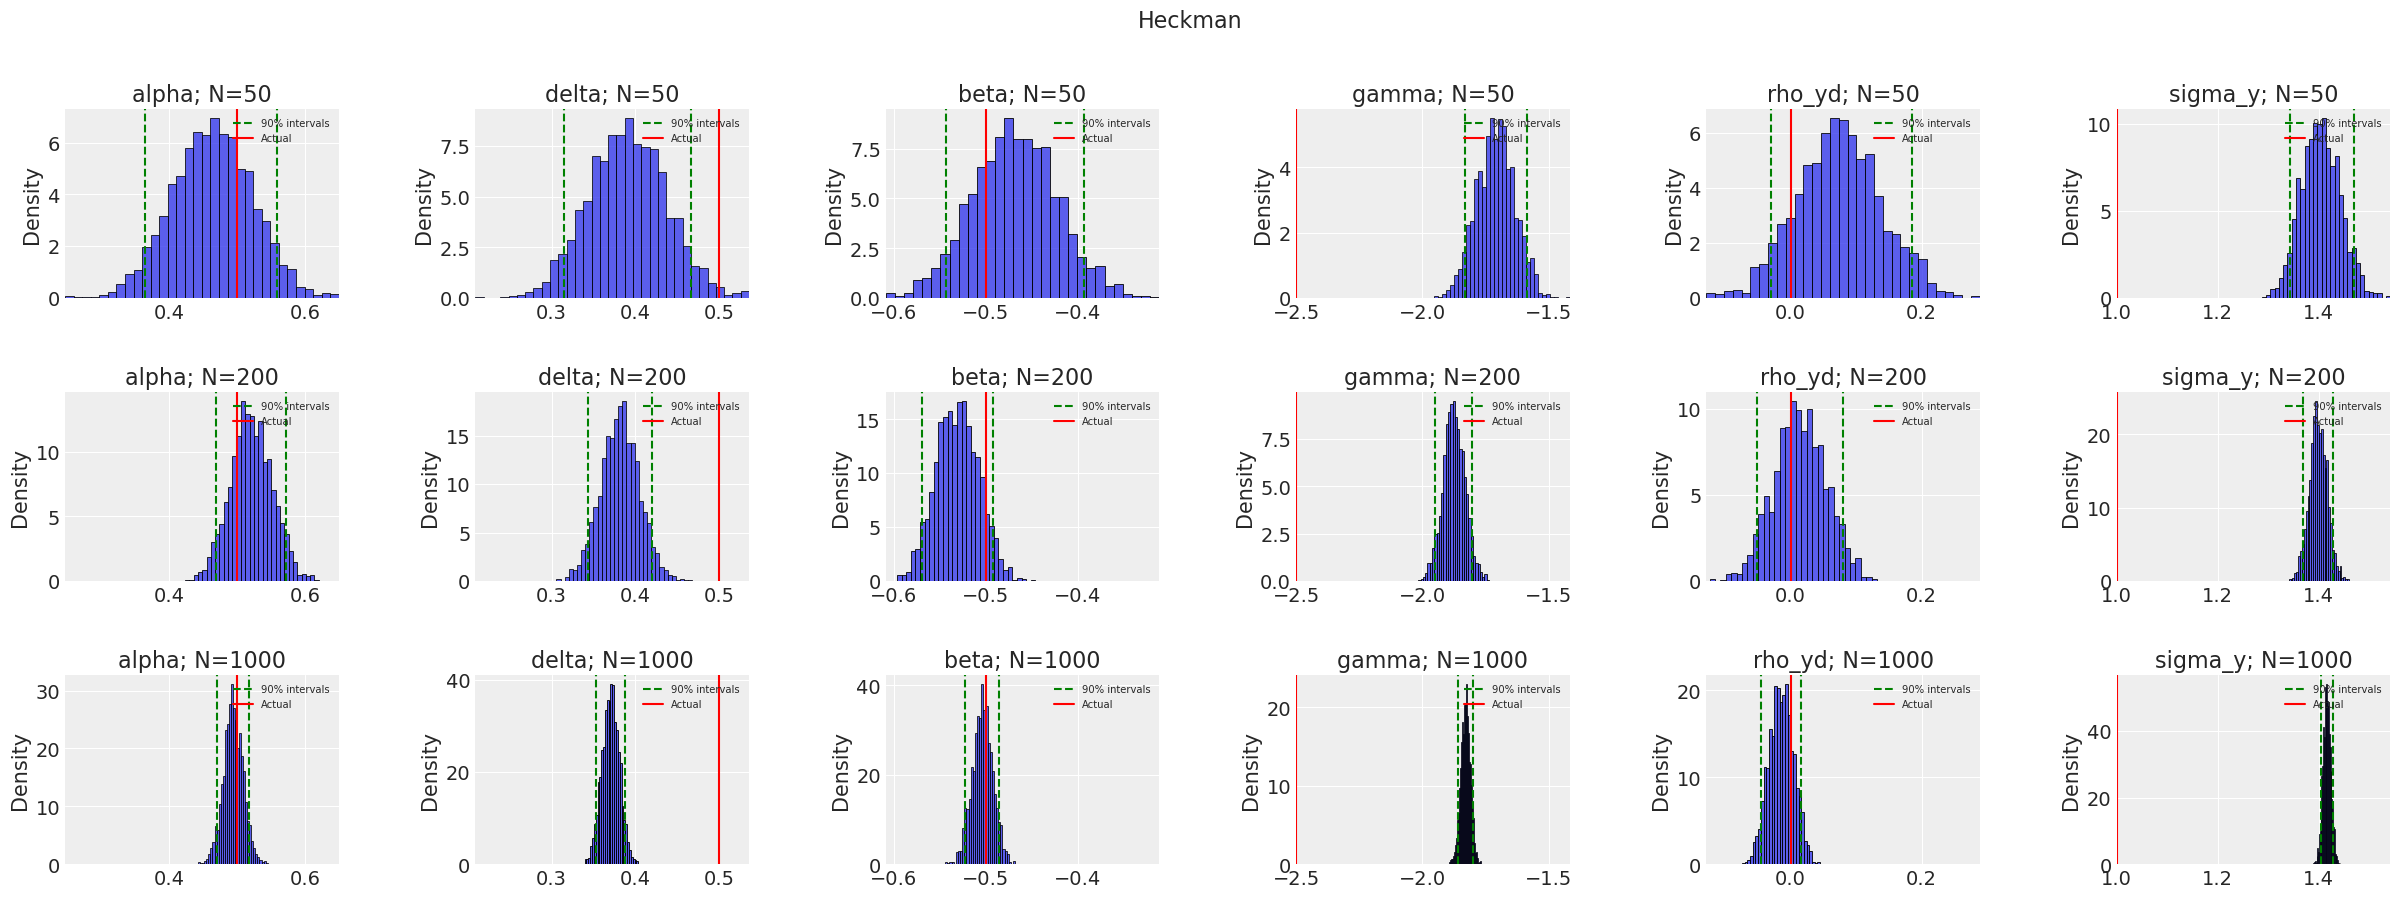

In [7]:
plot_posterior(case1_Heckman, figsize=(30,10))

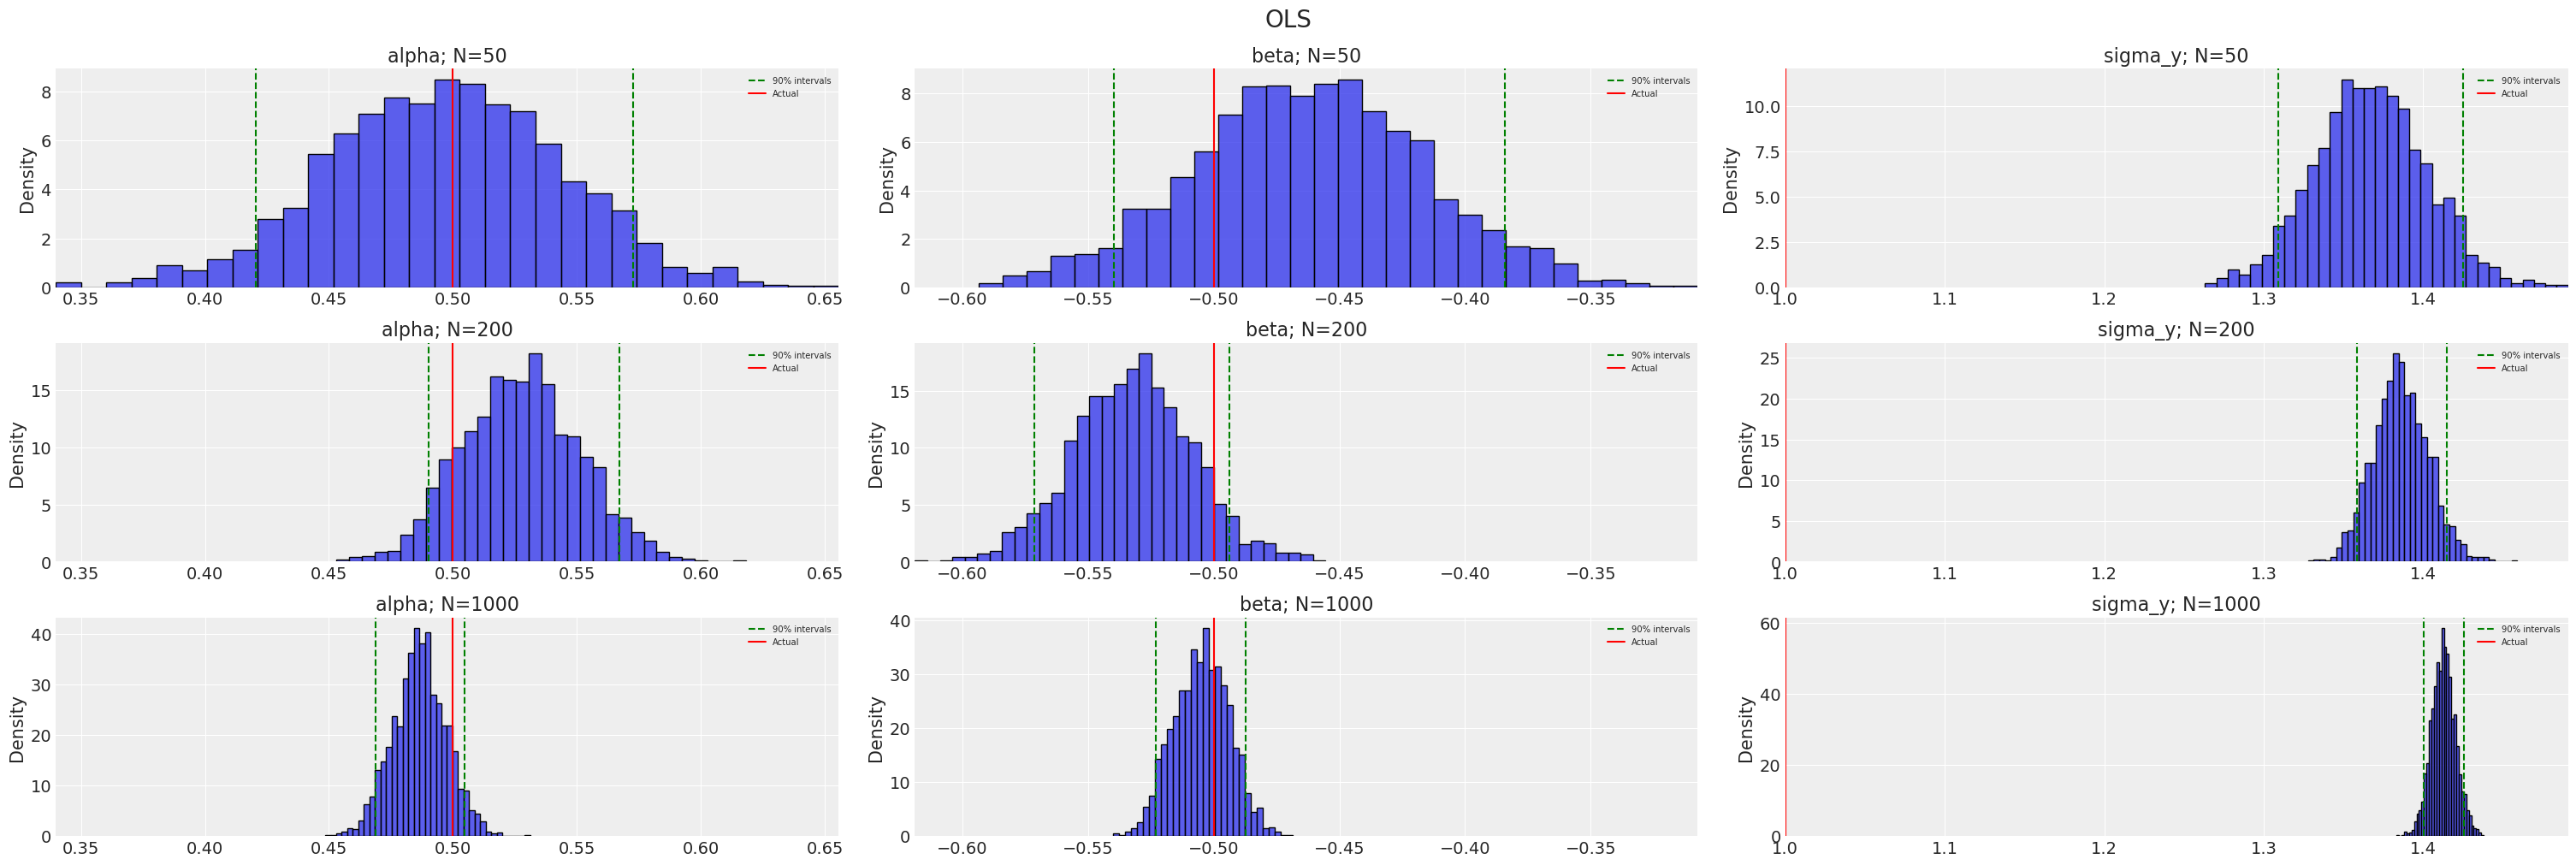

In [8]:
plot_posterior(case1_OLS, figsize=(30,10))

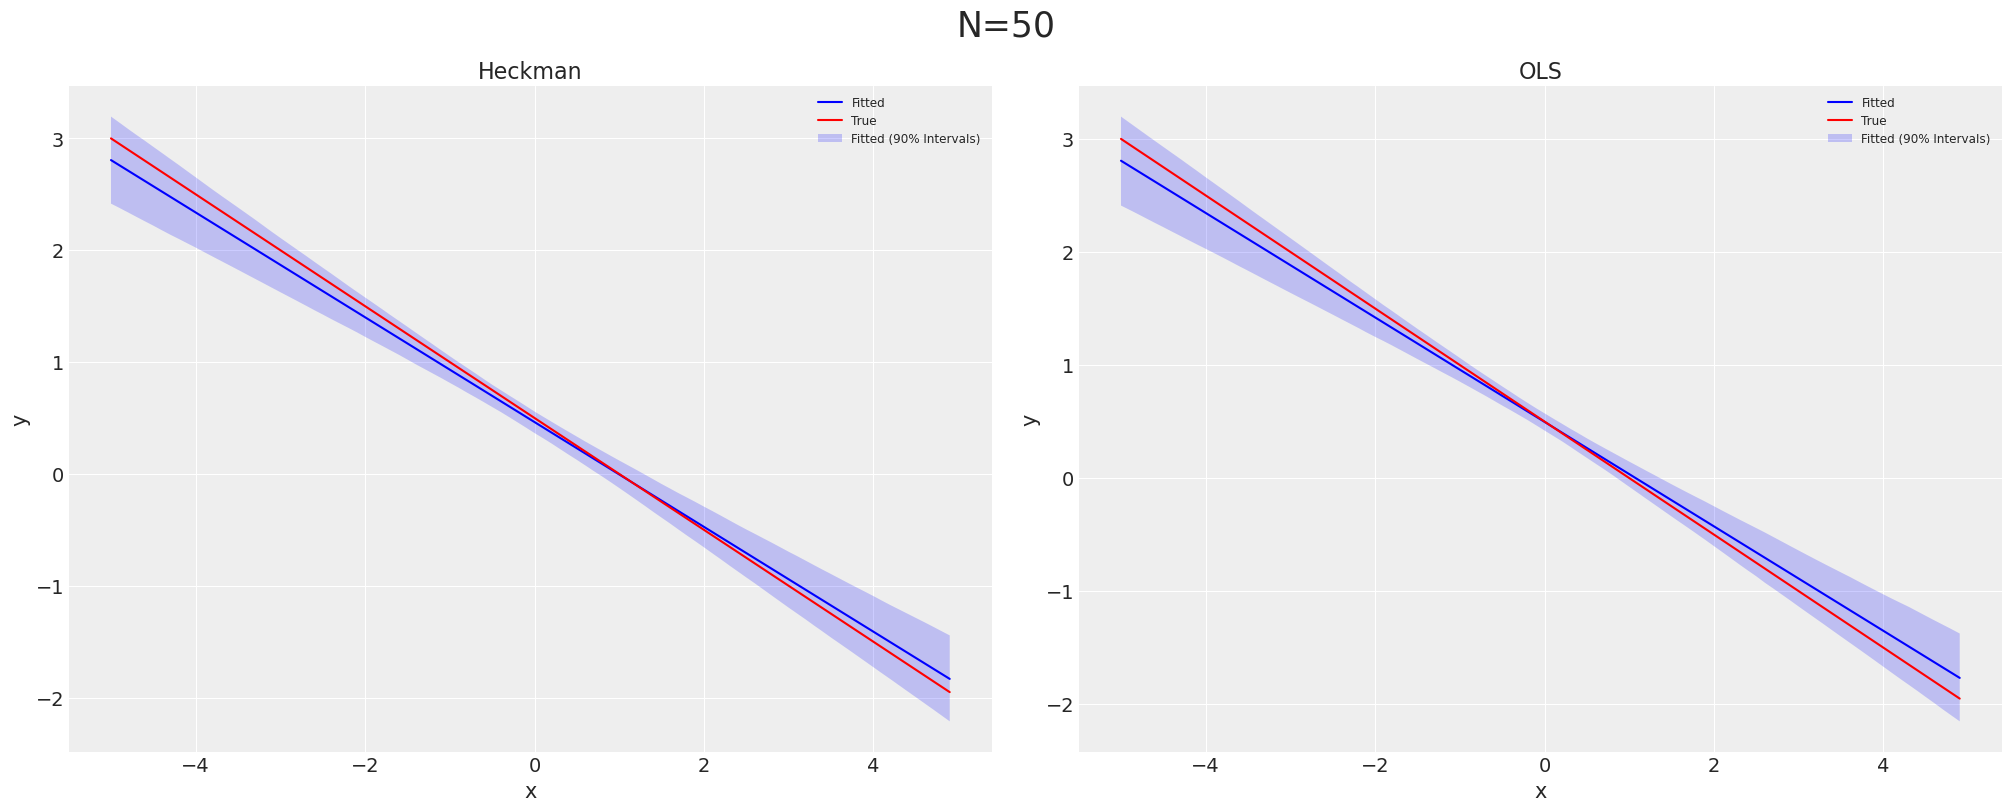

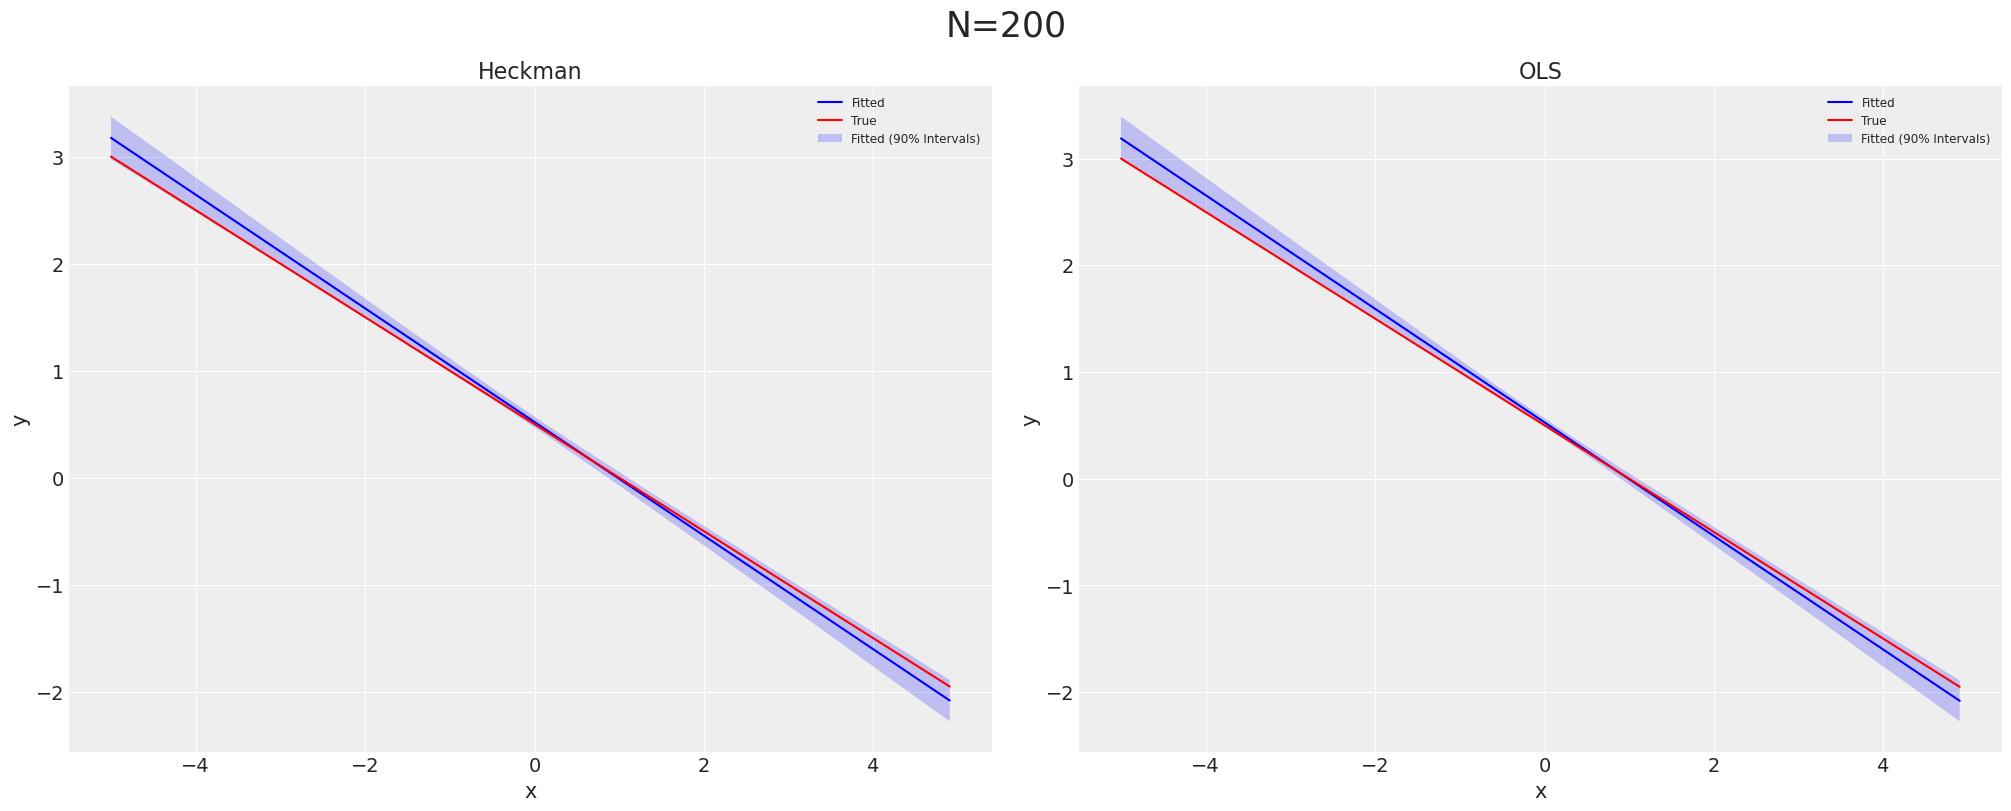

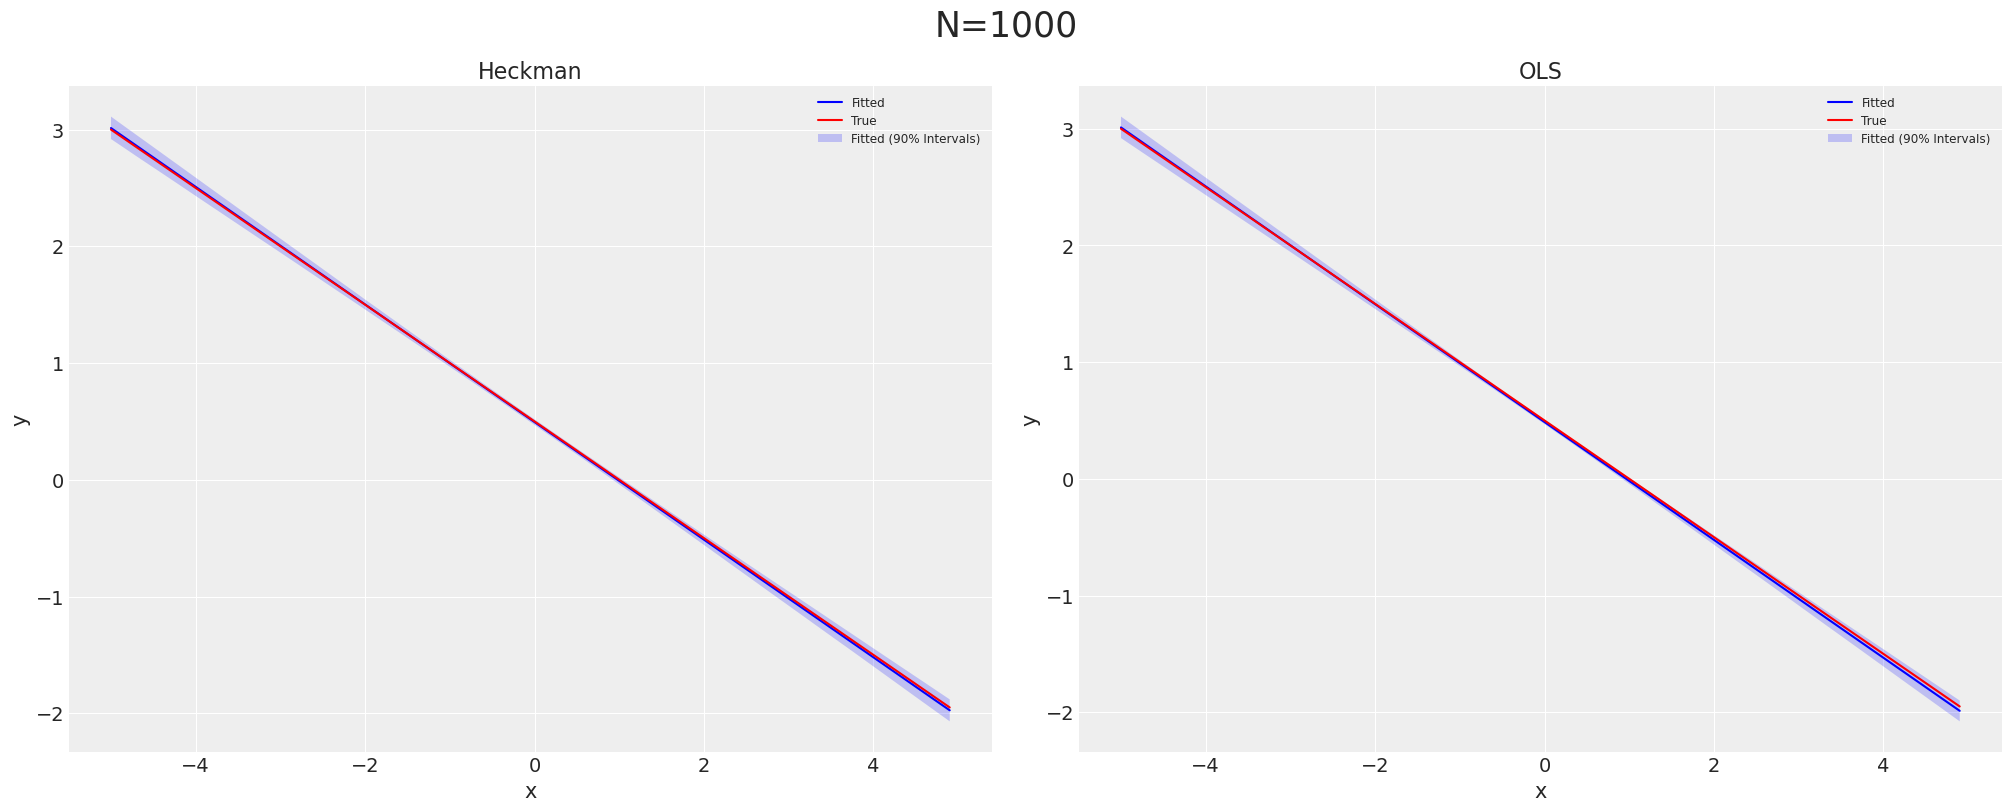

In [9]:
plot_mu_posterior(case1_Heckman, case1_OLS)

### Case 2: $\rho_{x,z} = 0.8$, $\rho_{y,d} =0$

In [4]:
case2_Heckman = dict.fromkeys(map(str, N_samples))
case2_OLS = dict.fromkeys(map(str, N_samples))

for i in range(len(N_samples)):
    for b in range(B):
        case2 = MissingDataExperiments(N = N_samples[i],
                                       alpha=0.5, beta=-0.5, delta=0.5, gamma=-2.5, sigma_y=1.0,
                                       rho_xz = 0.8, rho_yd = 0.0, m_error = False, distribution = 'Laplace',
                                       seed = r_ints[b])
        case2.generate_data()
        case2.stan_fit(type='Heckman')  
        if case2_Heckman[str(N_samples[i])] is None:
            case2_Heckman[str(N_samples[i])] = [case2]
        else:
            case2_Heckman[str(N_samples[i])].append(case2)
        
    
for i in range(len(N_samples)):
    for b in range(B):
        case2 = MissingDataExperiments(N = N_samples[i],
                                       alpha=0.5, beta=-0.5, delta=0.5, gamma=-2.5, sigma_y=1.0,
                                       rho_xz = 0.8, rho_yd = 0.0, m_error = False, distribution = 'Laplace',
                                       seed = r_ints[b])
        case2.generate_data()
        case2.stan_fit(type='OLS')  
        if case2_OLS[str(N_samples[i])] is None:
            case2_OLS[str(N_samples[i])] = [case2]
        else:
            case2_OLS[str(N_samples[i])].append(case2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d9

/Users/lguelman/Library/Mobile Documents/com~apple~CloudDocs/LG_Files/Development/UDA/python/utils.py:51: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(hspace = .5, wspace=.5)


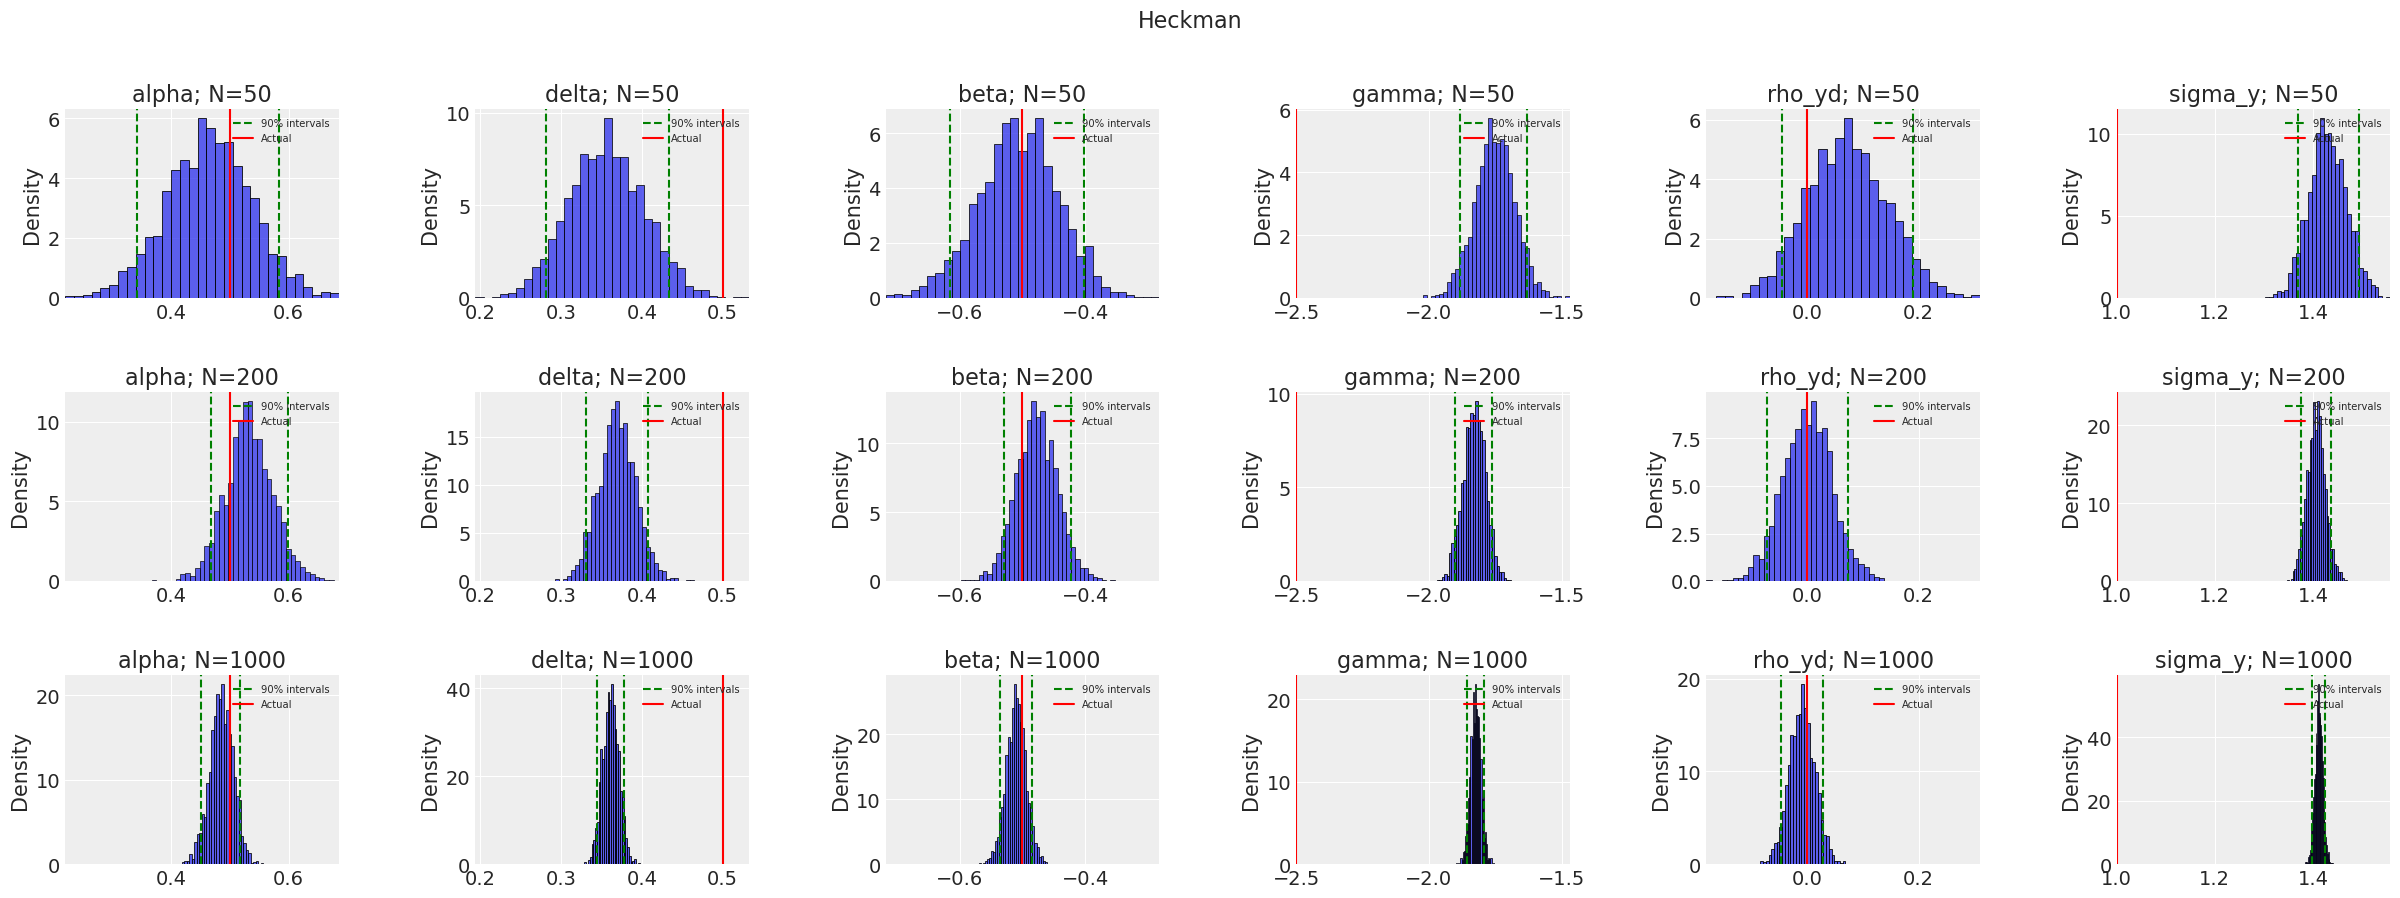

In [10]:
plot_posterior(case2_Heckman, figsize=(30,10))

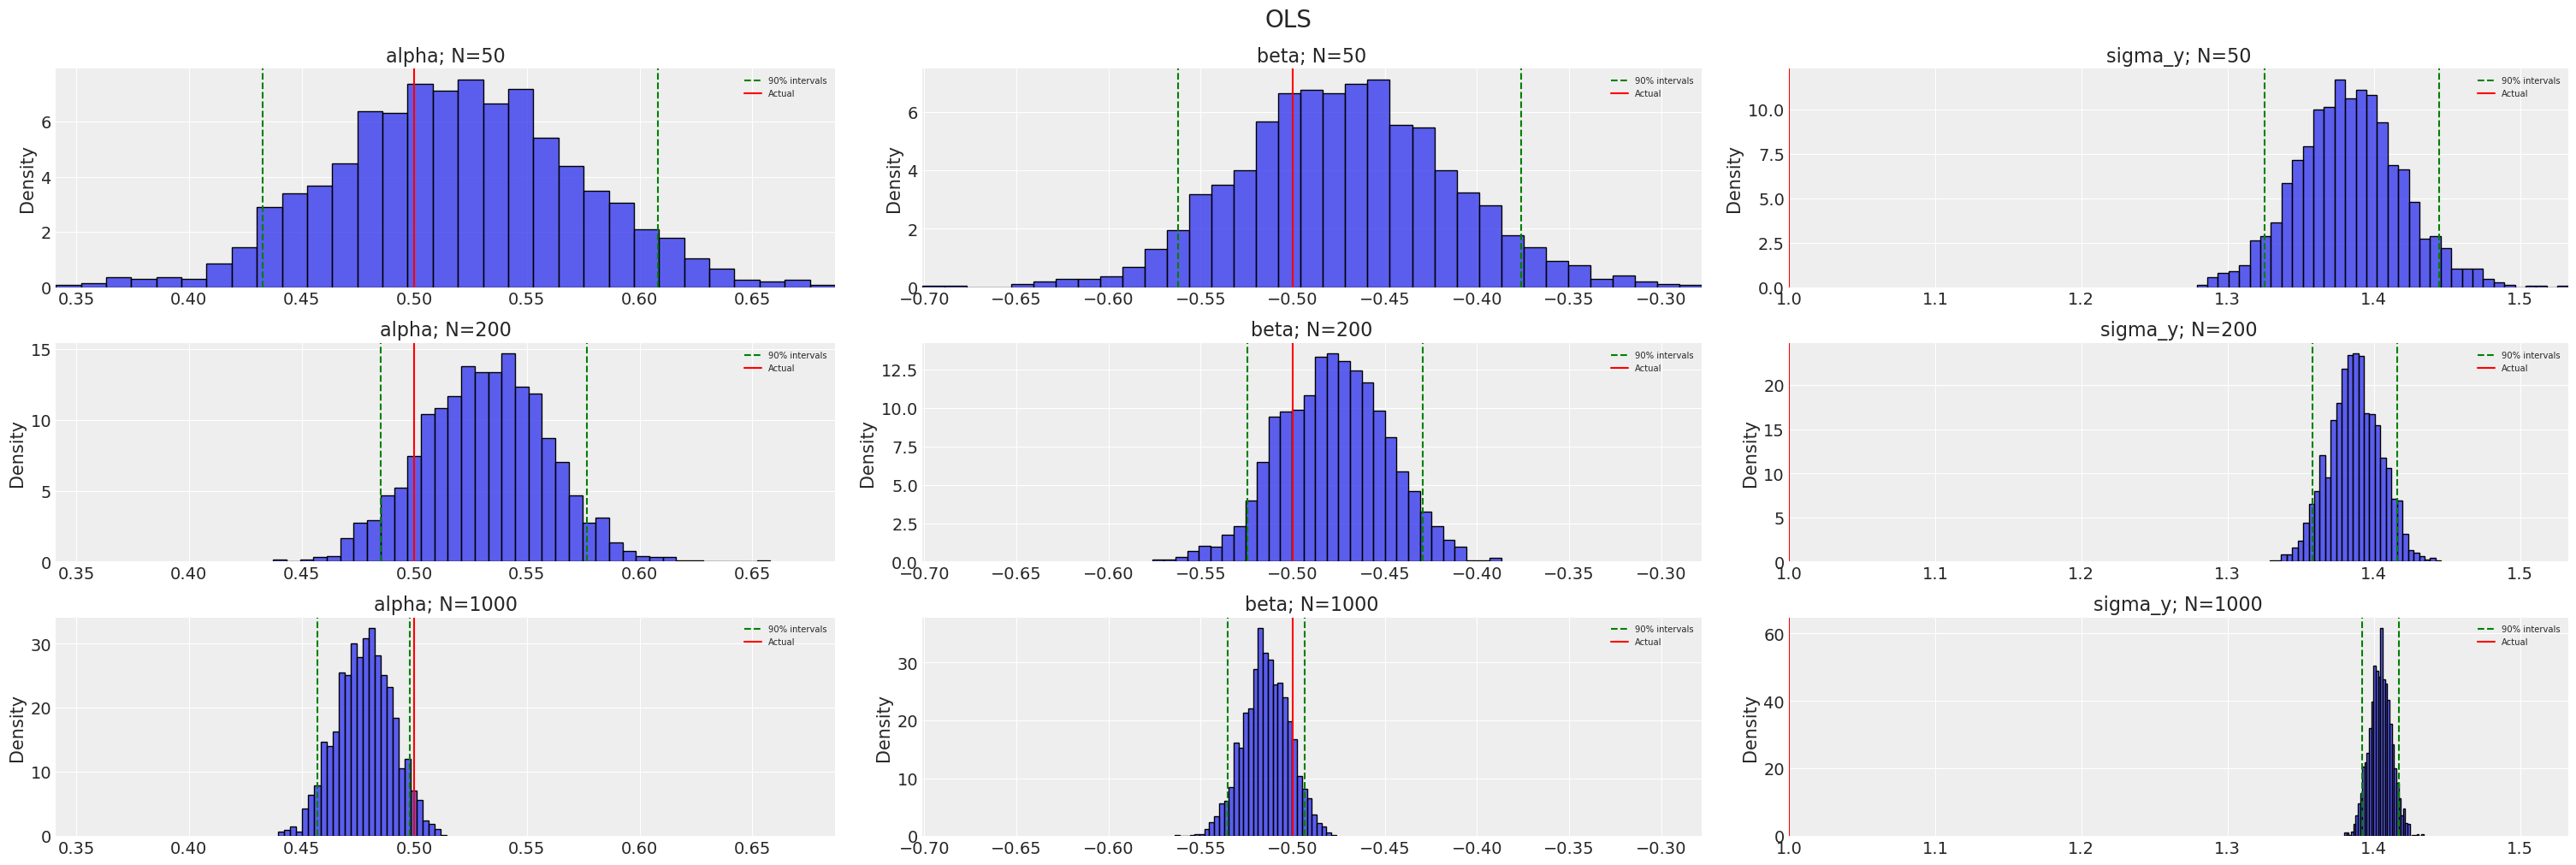

In [11]:
plot_posterior(case2_OLS, figsize=(30,10))

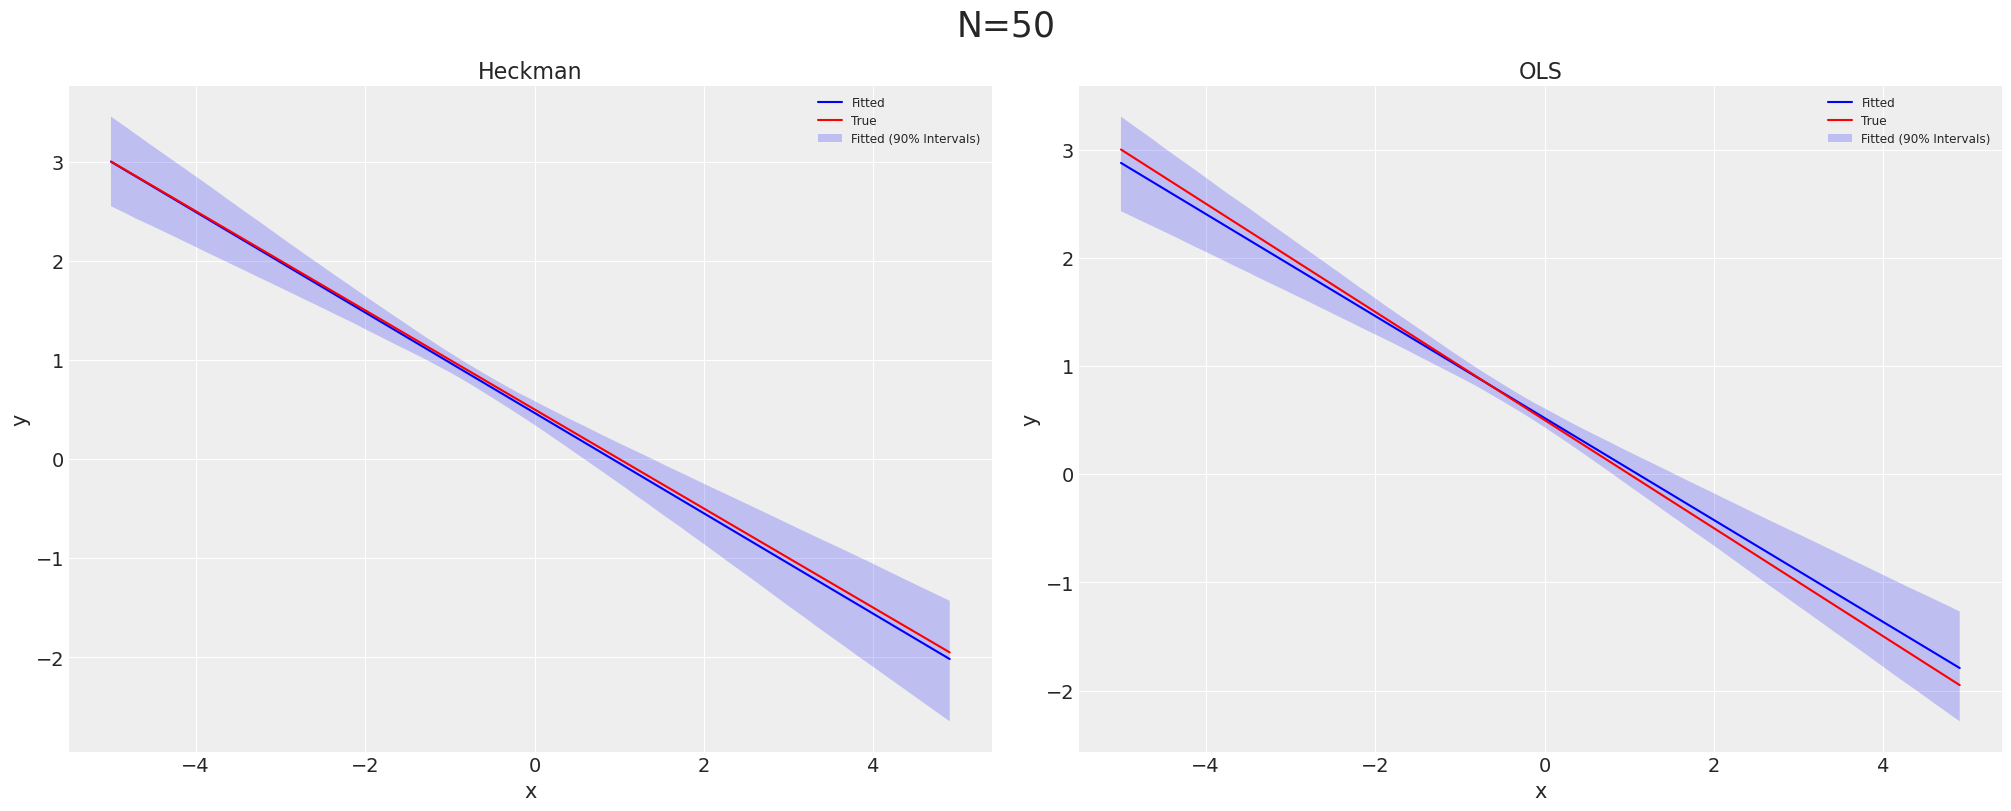

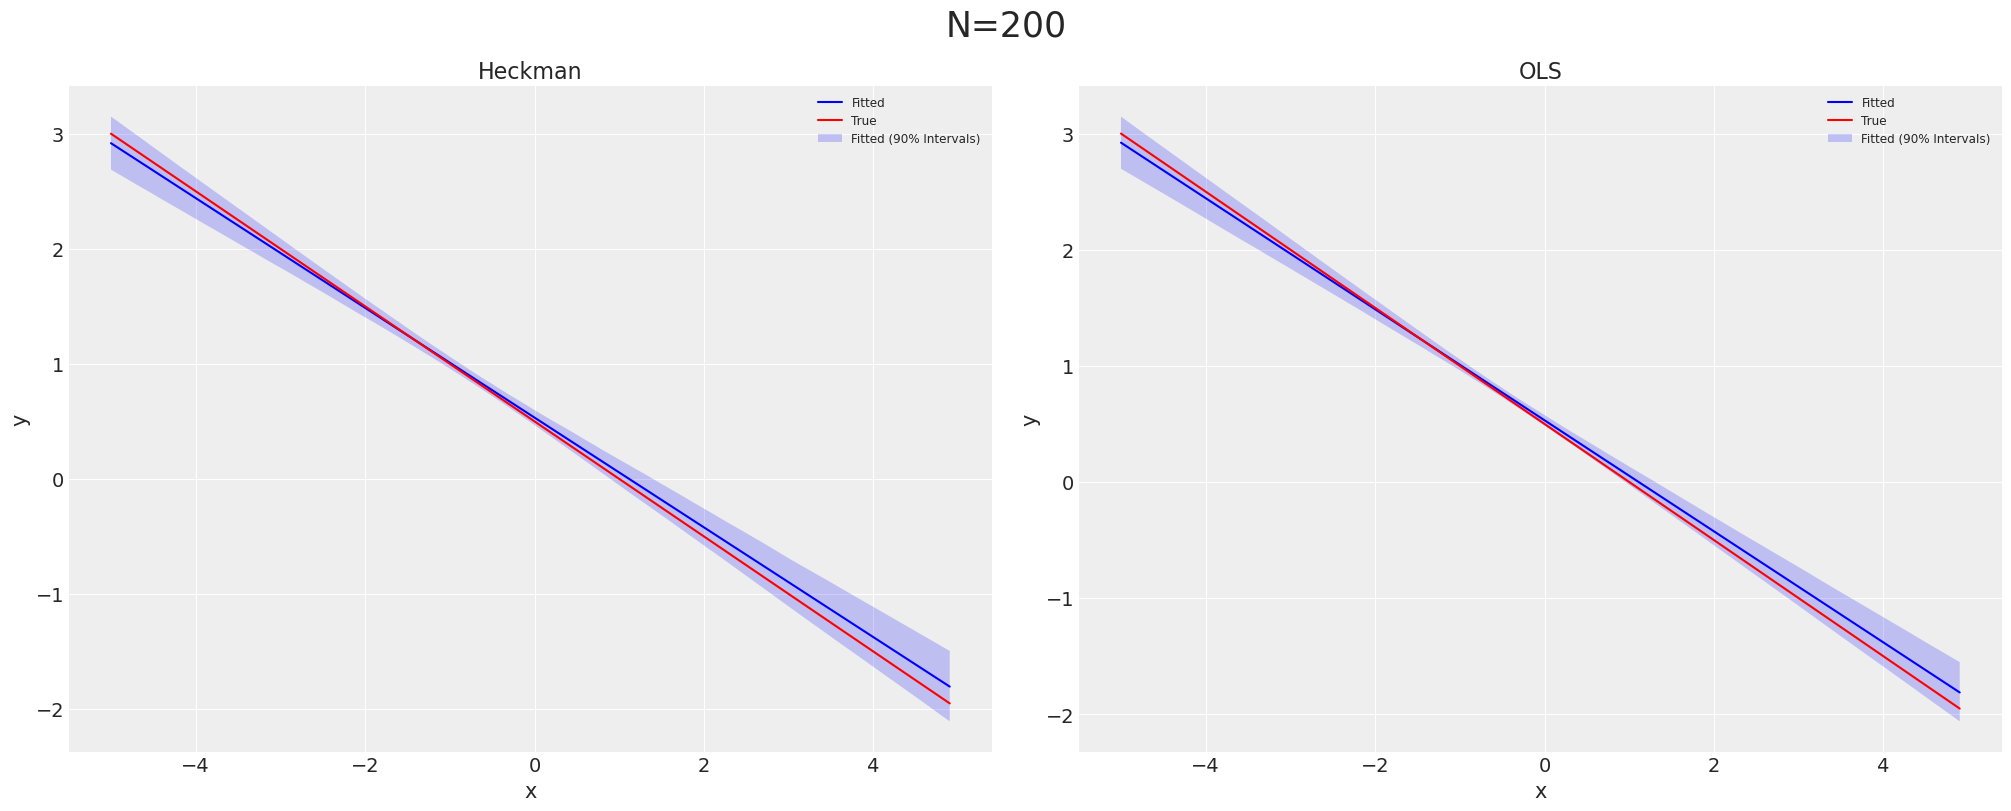

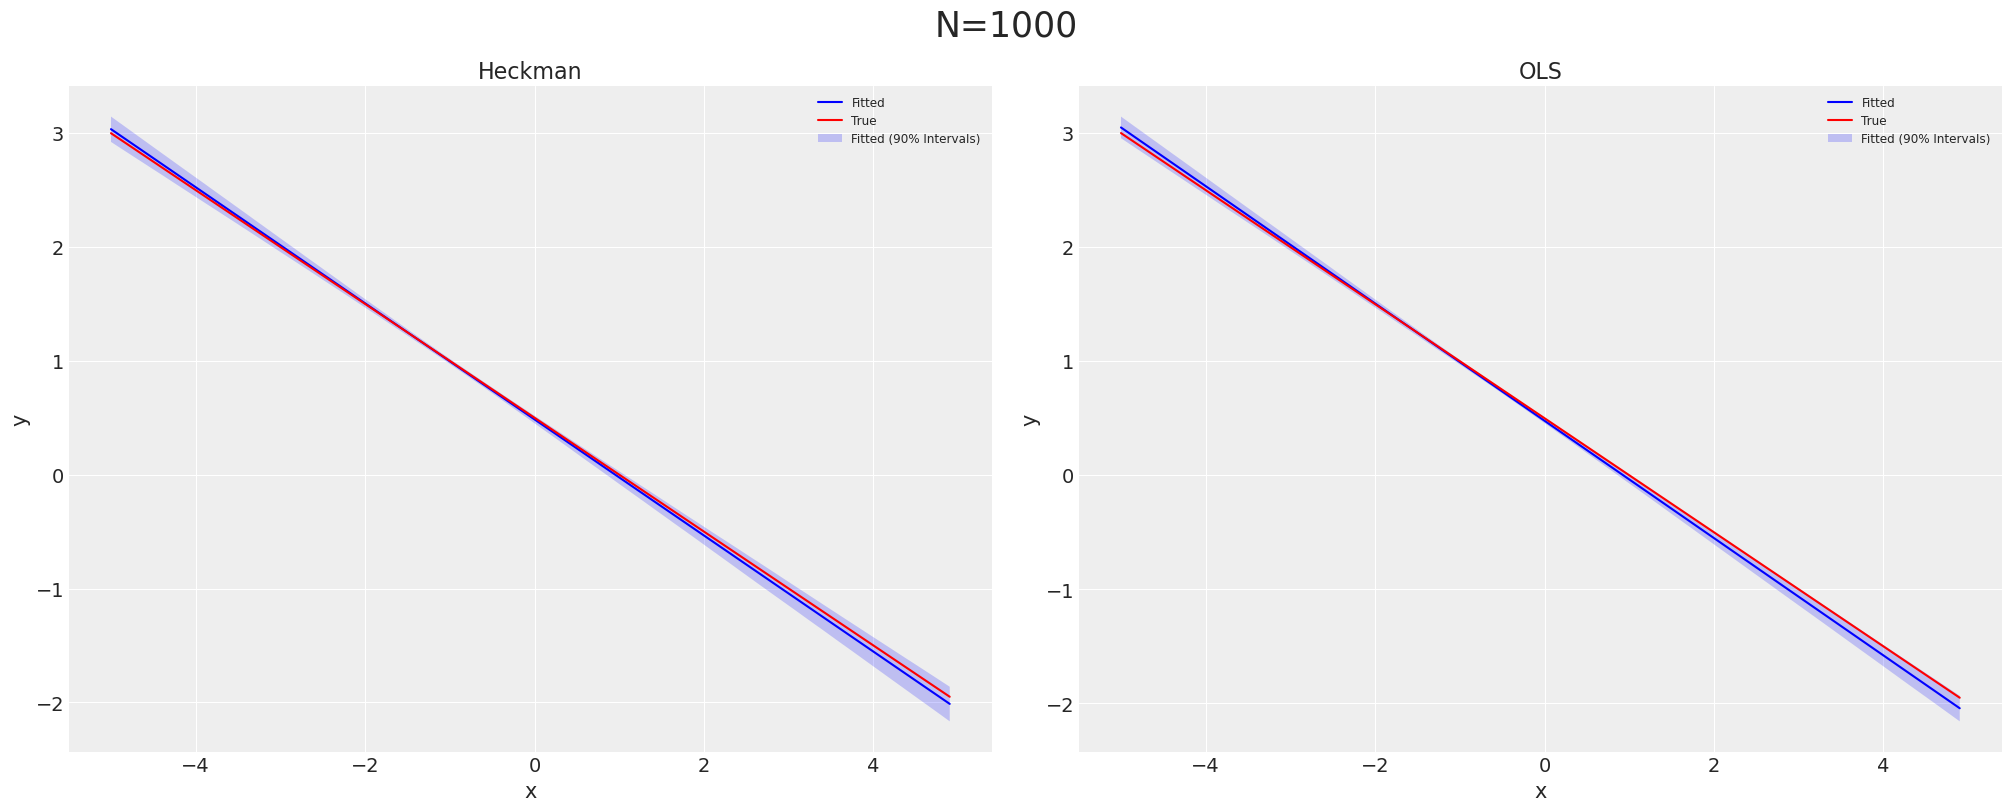

In [12]:
plot_mu_posterior(case2_Heckman, case2_OLS)

### Case 3: $\rho_{x,z} = 0$, $\rho_{y,d} =0.8$

In [5]:
case3_Heckman = dict.fromkeys(map(str, N_samples))
case3_OLS = dict.fromkeys(map(str, N_samples))

for i in range(len(N_samples)):
    for b in range(B):
        case3 = MissingDataExperiments(N = N_samples[i],
                                       alpha=0.5, beta=-0.5, delta=0.5, gamma=-2.5, sigma_y=1.0,
                                       rho_xz = 0.0, rho_yd = 0.8, m_error = False, distribution = 'Laplace',
                                       seed = r_ints[b])
        case3.generate_data()
        case3.stan_fit(type='Heckman')  
        if case3_Heckman[str(N_samples[i])] is None:
            case3_Heckman[str(N_samples[i])] = [case3]
        else:
            case3_Heckman[str(N_samples[i])].append(case3)
        
    
for i in range(len(N_samples)):
    for b in range(B):
        case3 = MissingDataExperiments(N = N_samples[i],
                                       alpha=0.5, beta=-0.5, delta=0.5, gamma=-2.5, sigma_y=1.0,
                                       rho_xz = 0.0, rho_yd = 0.8, m_error = False, distribution = 'Laplace',
                                       seed = r_ints[b])
        case3.generate_data()
        case3.stan_fit(type='OLS')  
        if case3_OLS[str(N_samples[i])] is None:
            case3_OLS[str(N_samples[i])] = [case3]
        else:
            case3_OLS[str(N_samples[i])].append(case3)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d9

/Users/lguelman/Library/Mobile Documents/com~apple~CloudDocs/LG_Files/Development/UDA/python/utils.py:51: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(hspace = .5, wspace=.5)


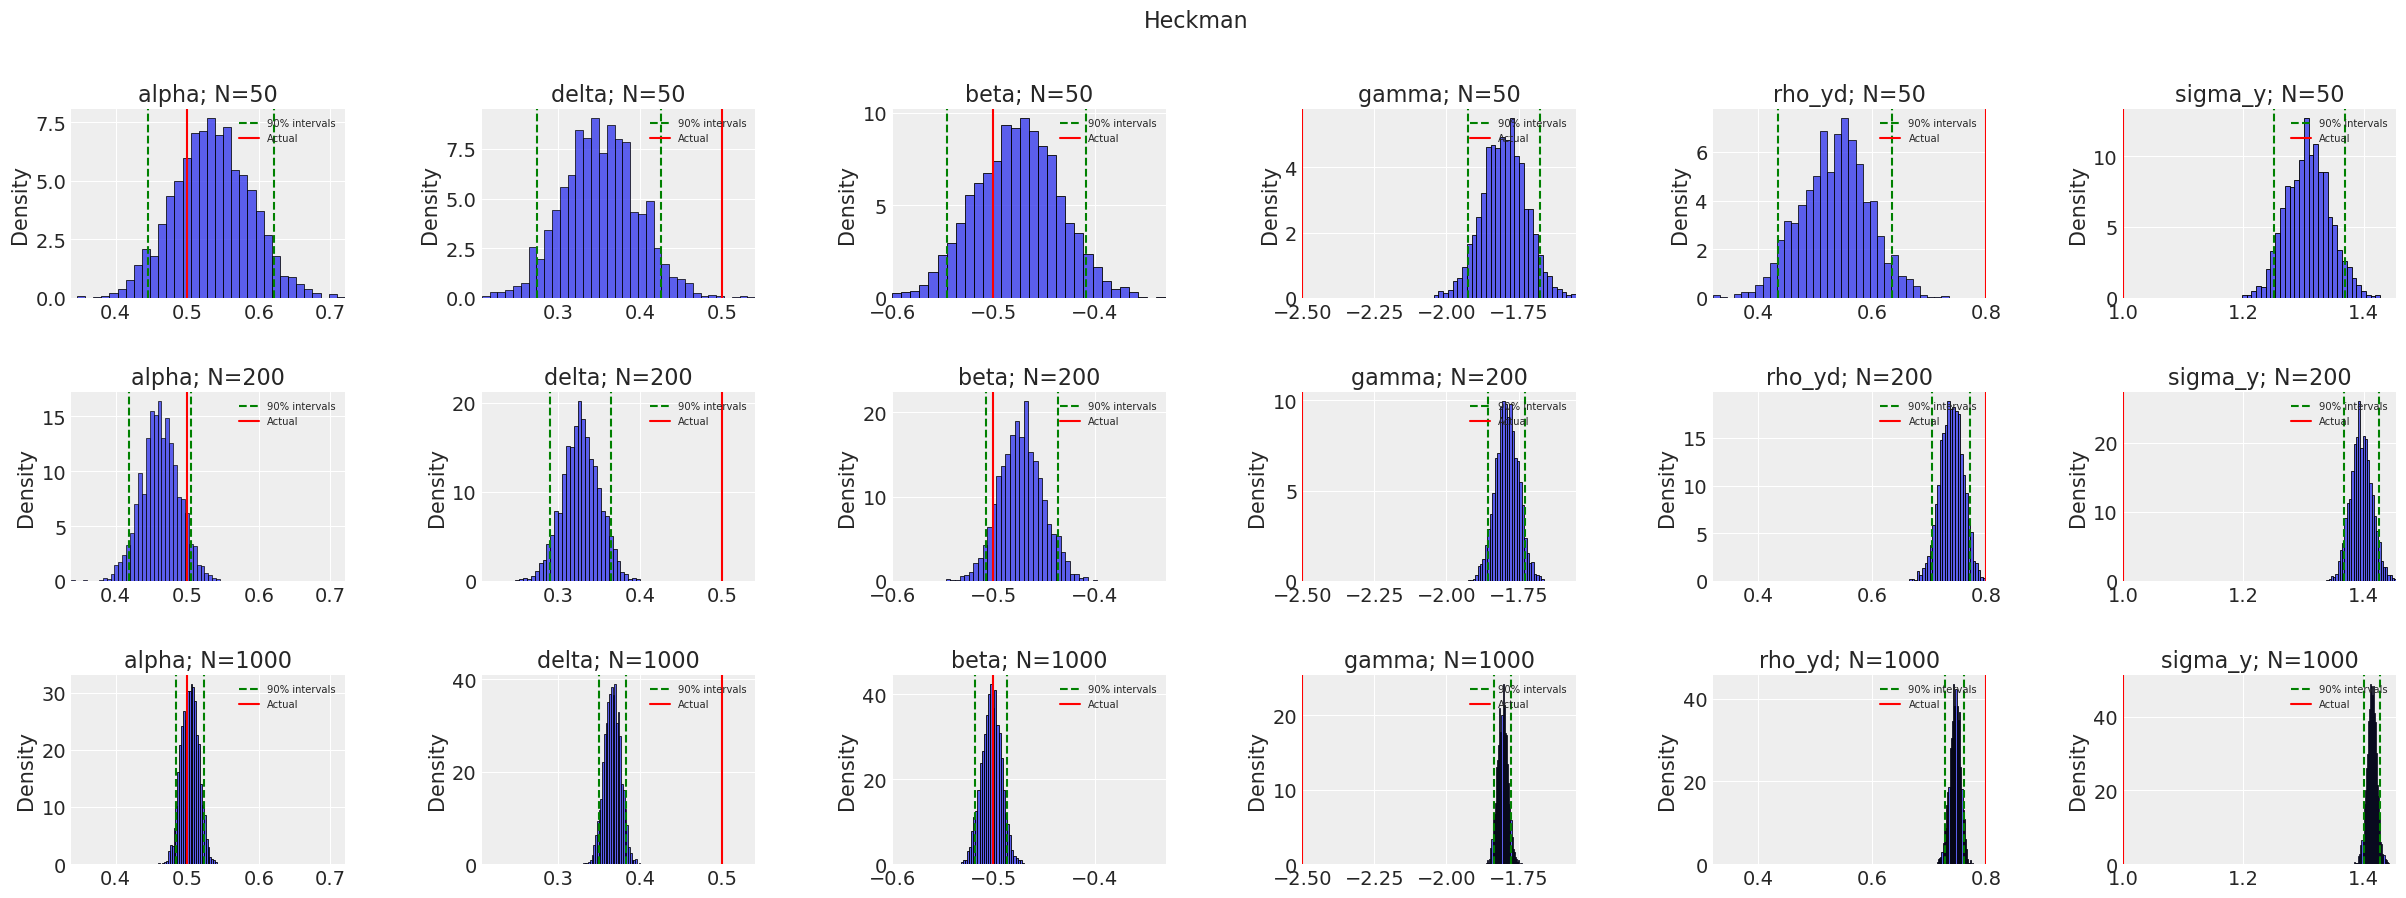

In [13]:
plot_posterior(case3_Heckman, figsize=(30,10))

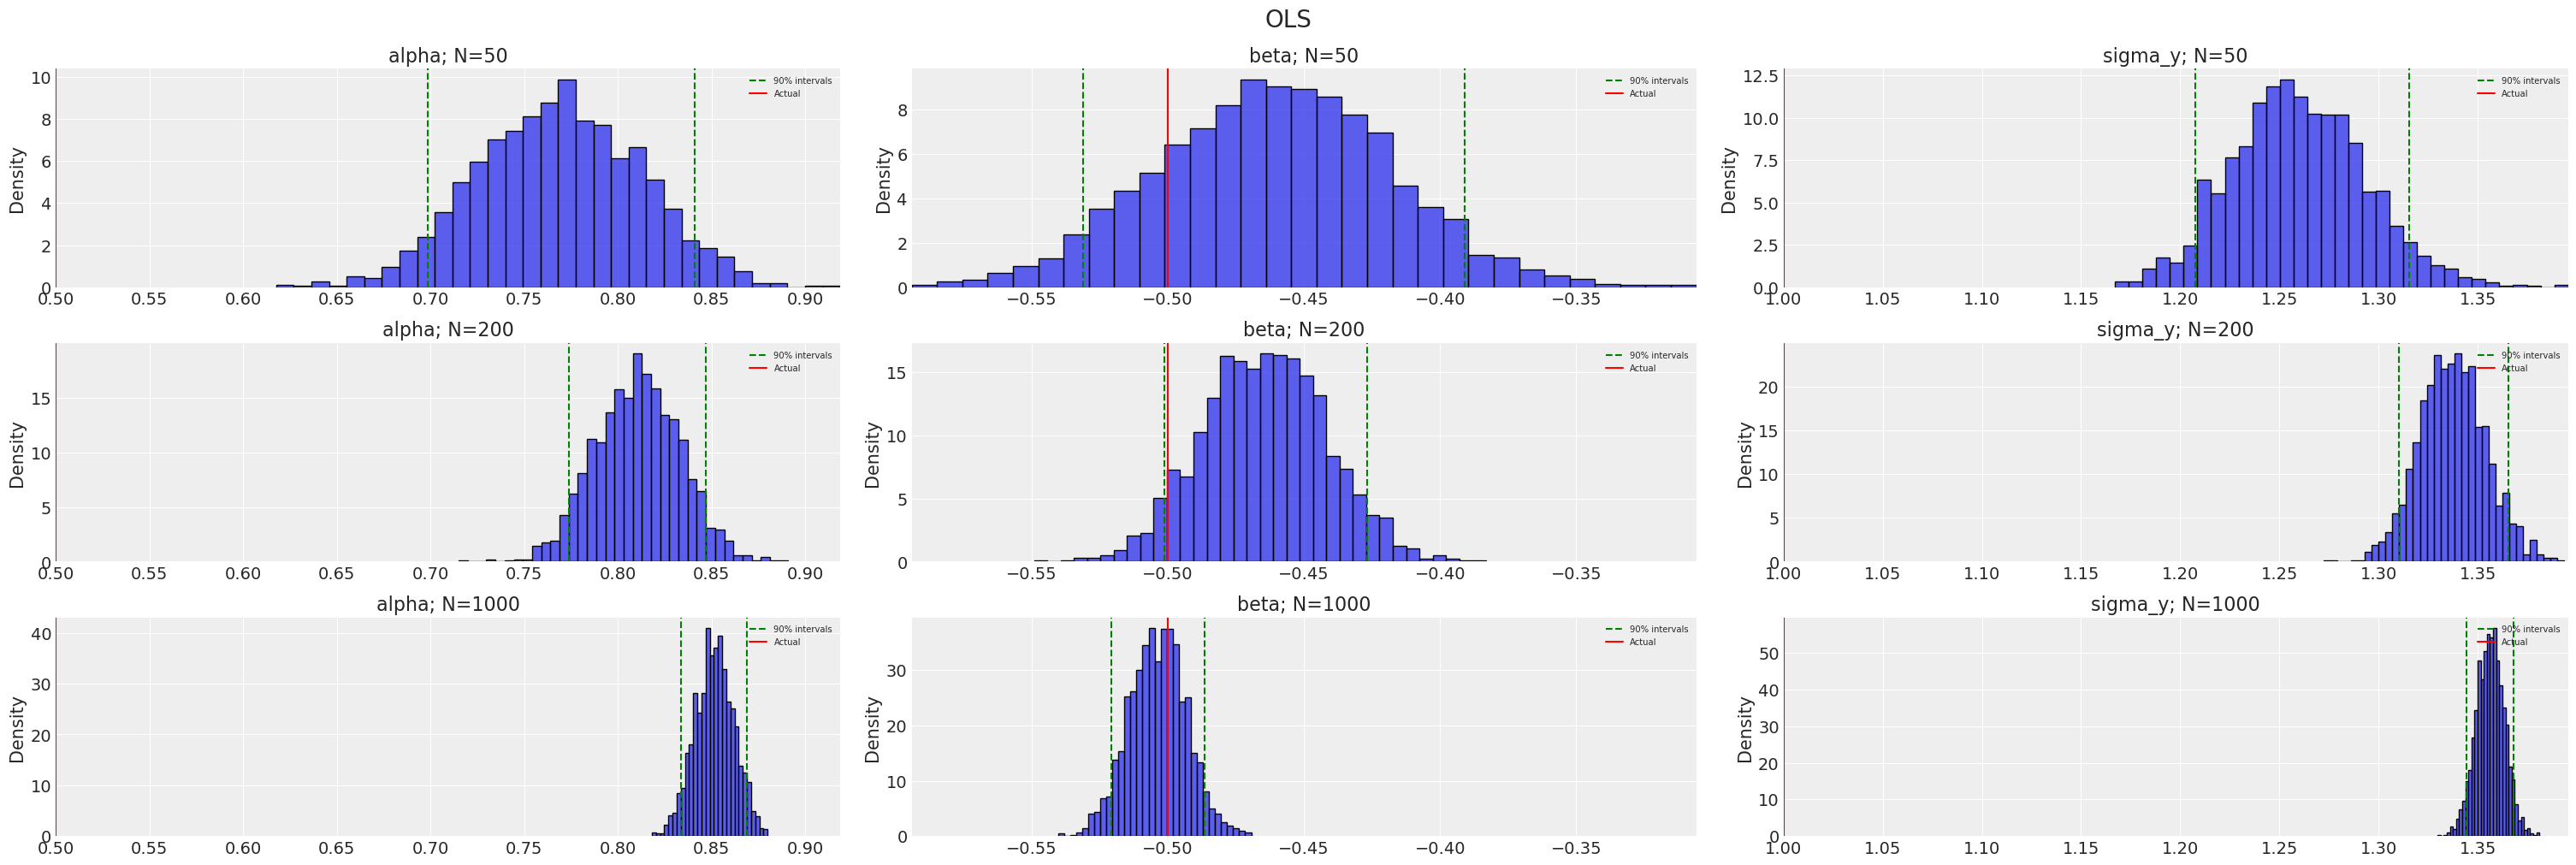

In [14]:
plot_posterior(case3_OLS, figsize=(30,10))

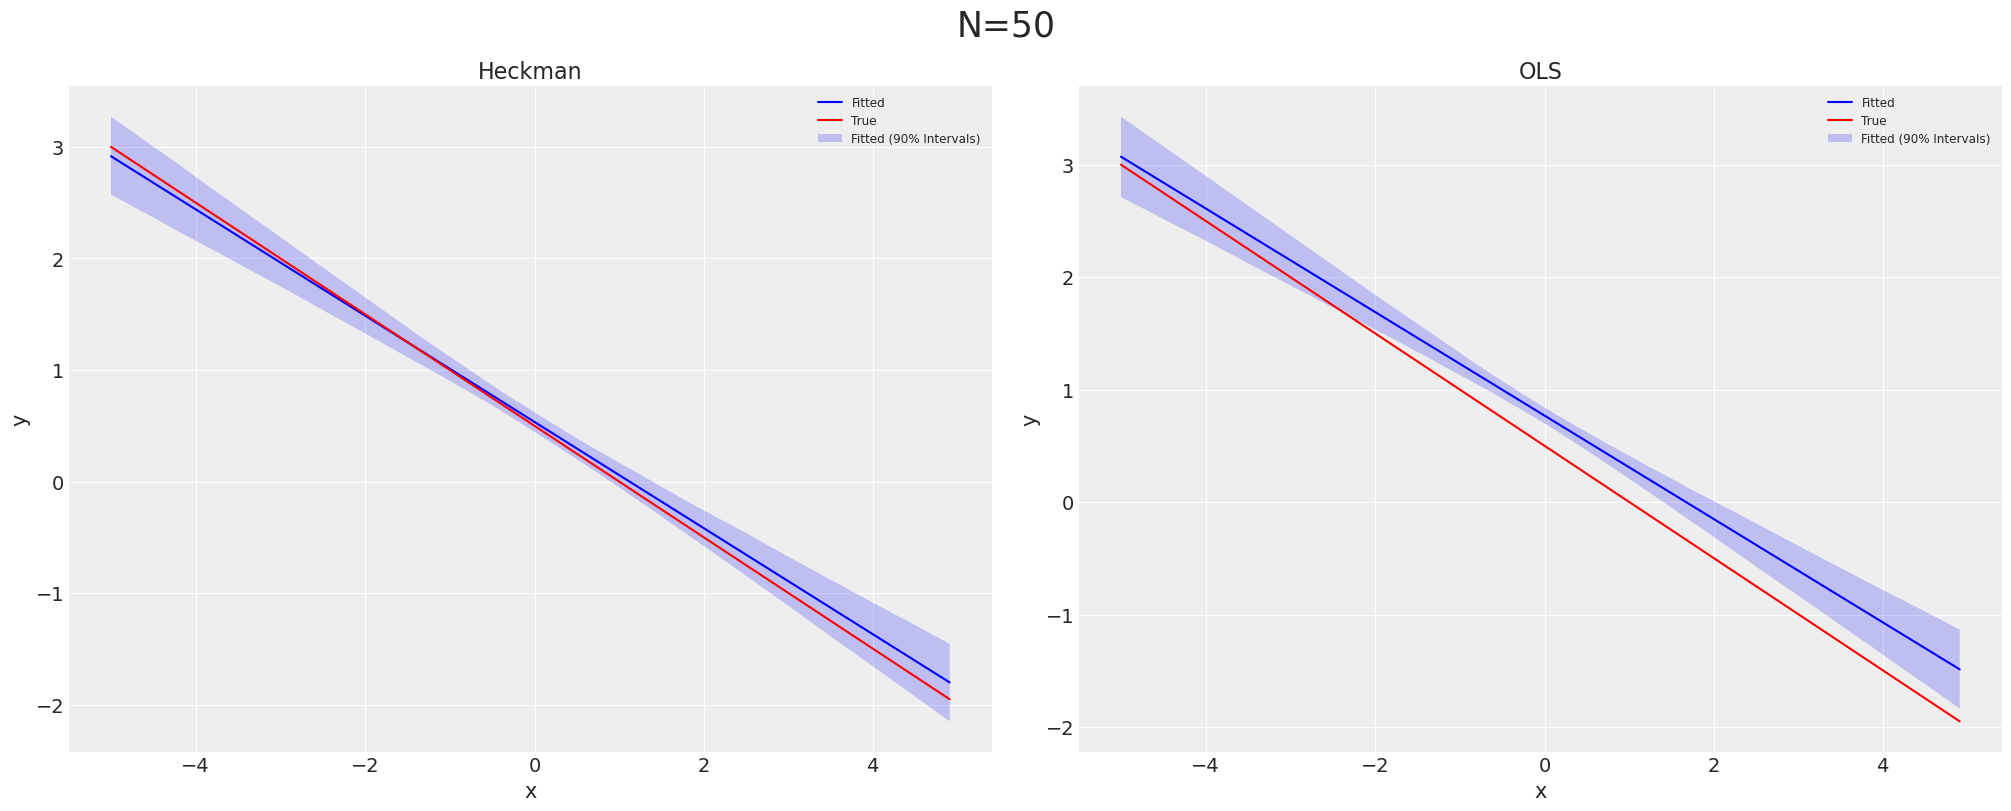

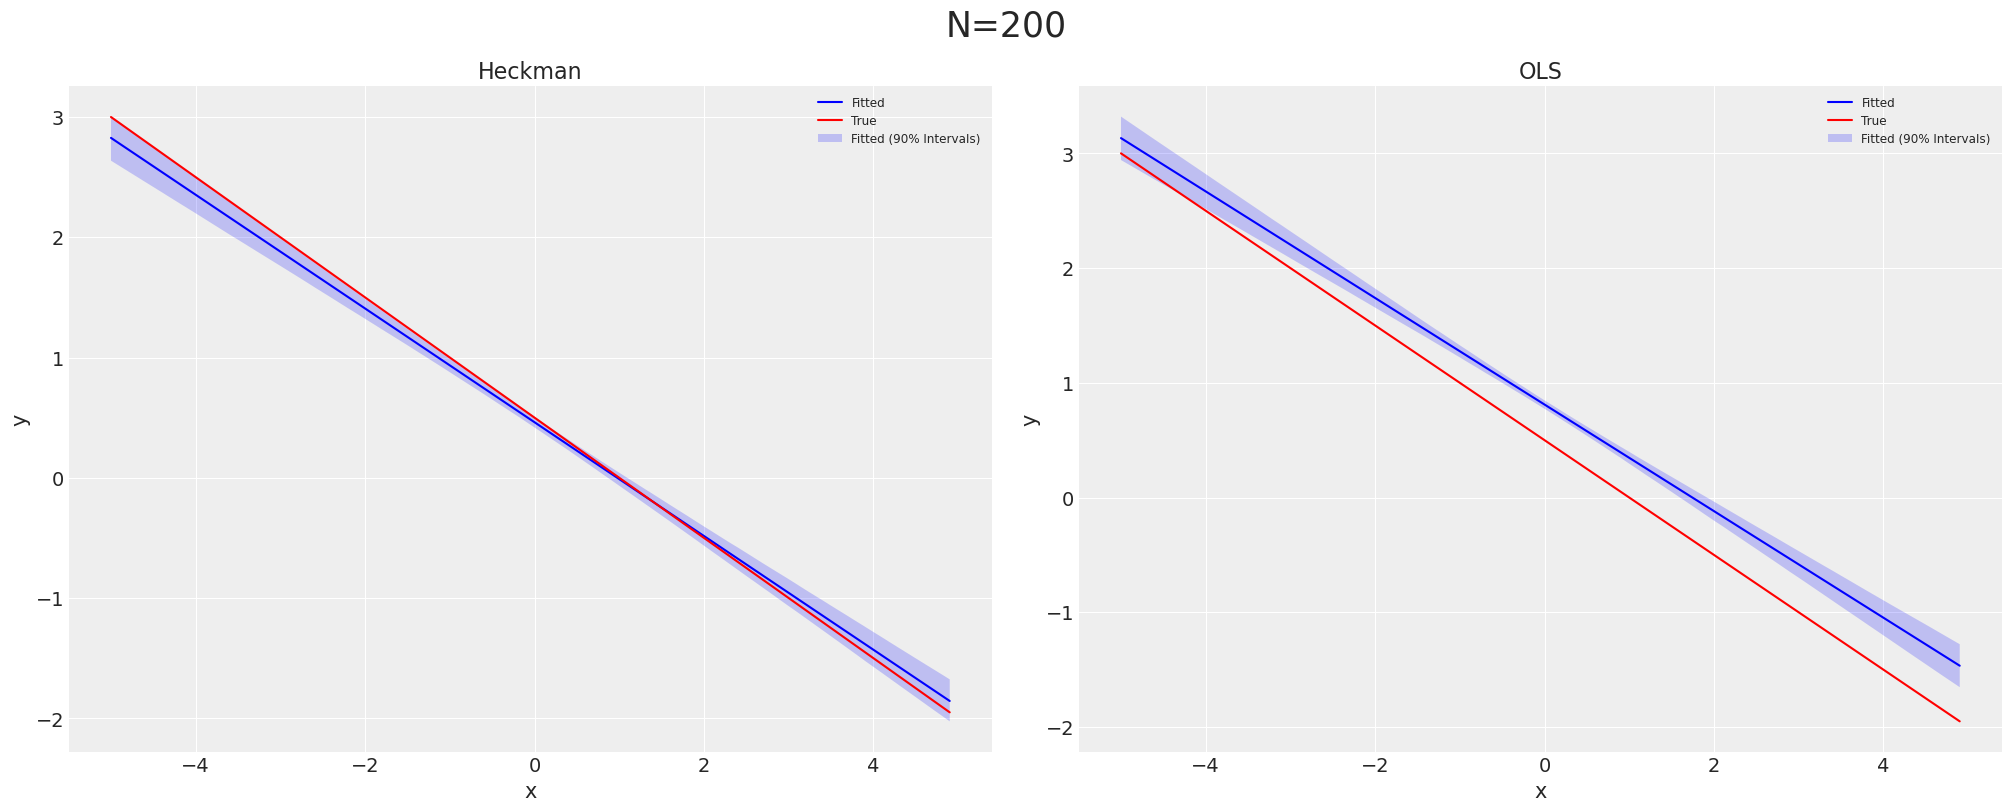

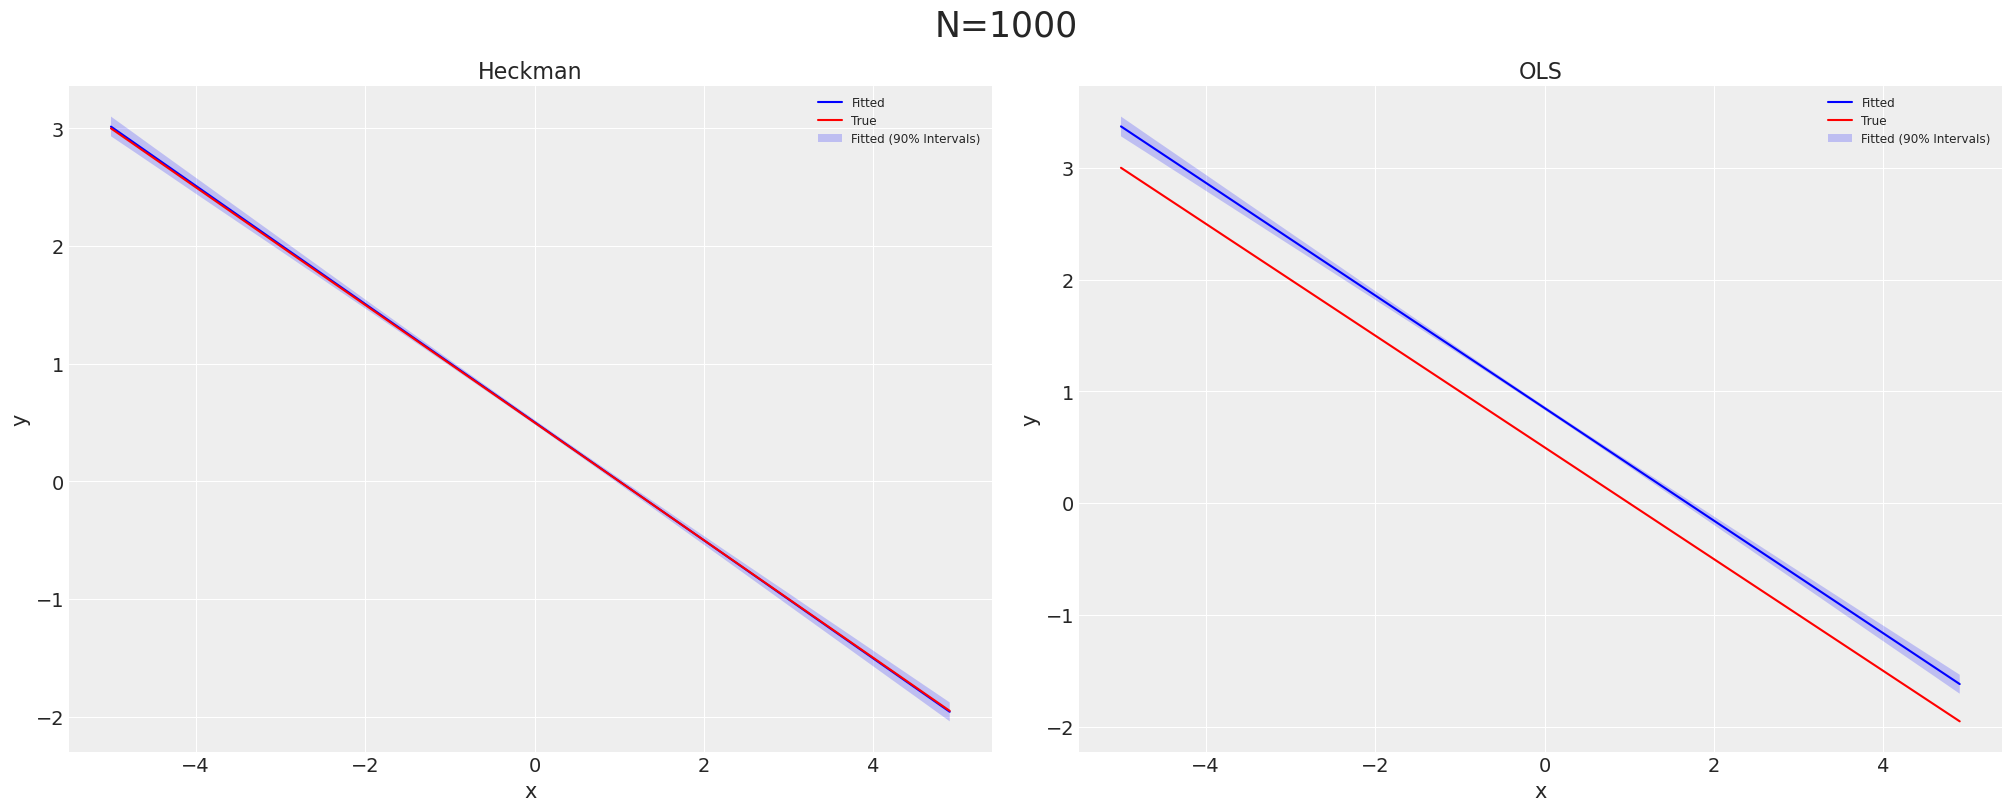

In [15]:
plot_mu_posterior(case3_Heckman, case3_OLS)

### Case 4: $\rho_{x,z} = 0.8$, $\rho_{y,d} =0.8$

In [6]:
case4_Heckman = dict.fromkeys(map(str, N_samples))
case4_OLS = dict.fromkeys(map(str, N_samples))

for i in range(len(N_samples)):
    for b in range(B):
        case4 = MissingDataExperiments(N = N_samples[i],
                                       alpha=0.5, beta=-0.5, delta=0.5, gamma=-2.5, sigma_y=1.0,
                                       rho_xz = 0.8, rho_yd = 0.8, m_error = False, distribution = 'Laplace',
                                       seed = r_ints[b])
        case4.generate_data()
        case4.stan_fit(type='Heckman')  
        if case4_Heckman[str(N_samples[i])] is None:
            case4_Heckman[str(N_samples[i])] = [case4]
        else:
            case4_Heckman[str(N_samples[i])].append(case4)
        
    
for i in range(len(N_samples)):
    for b in range(B):
        case4 = MissingDataExperiments(N = N_samples[i],
                                       alpha=0.5, beta=-0.5, delta=0.5, gamma=-2.5, sigma_y=1.0,
                                       rho_xz = 0.8, rho_yd = 0.8, m_error = False, distribution = 'Laplace',
                                       seed = r_ints[b])
        case4.generate_data()
        case4.stan_fit(type='OLS')  
        if case4_OLS[str(N_samples[i])] is None:
            case4_OLS[str(N_samples[i])] = [case4]
        else:
            case4_OLS[str(N_samples[i])].append(case4)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5b75928620fd147b4b3153c0ab8c5 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9fd5

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d98457d415db41d19a30a7aa620401 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d9

/Users/lguelman/Library/Mobile Documents/com~apple~CloudDocs/LG_Files/Development/UDA/python/utils.py:51: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(hspace = .5, wspace=.5)


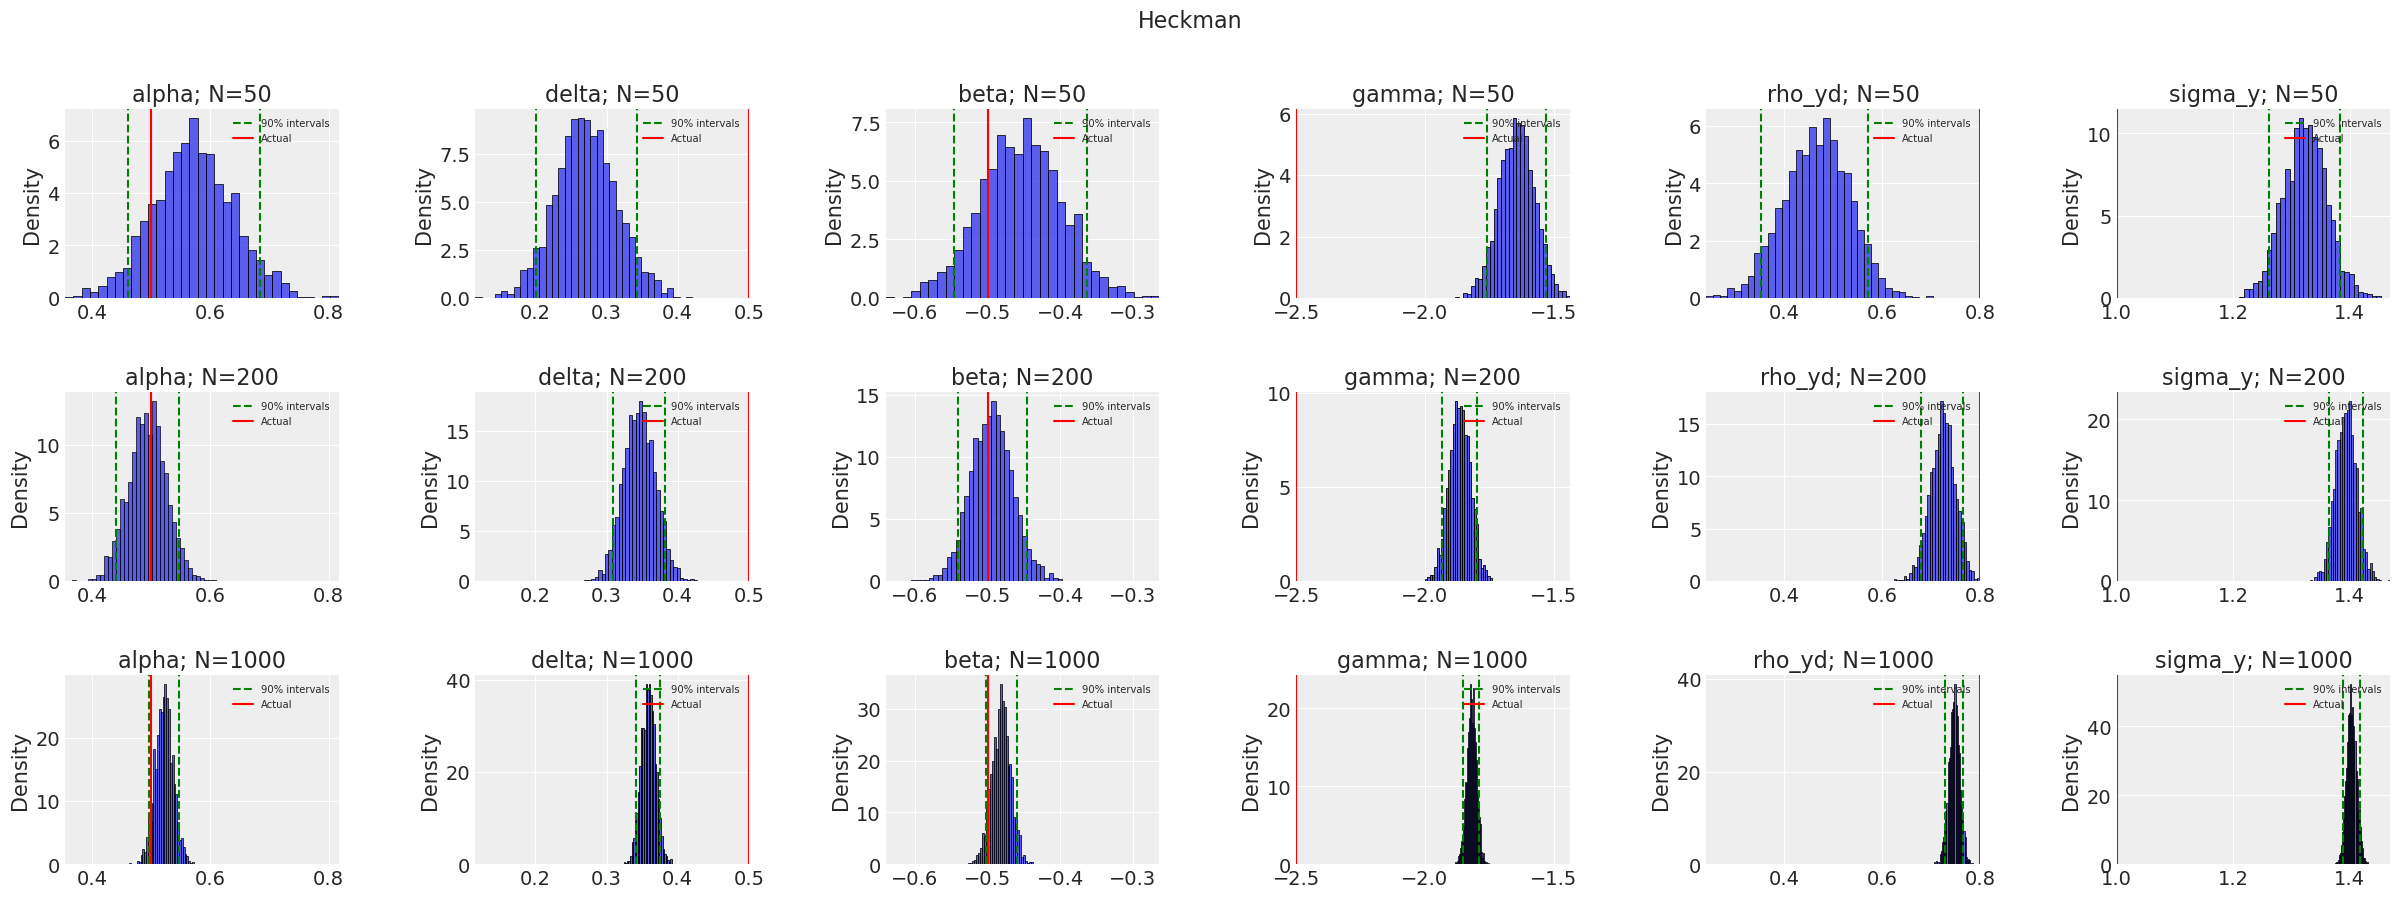

In [16]:
plot_posterior(case4_Heckman, figsize=(30,10))

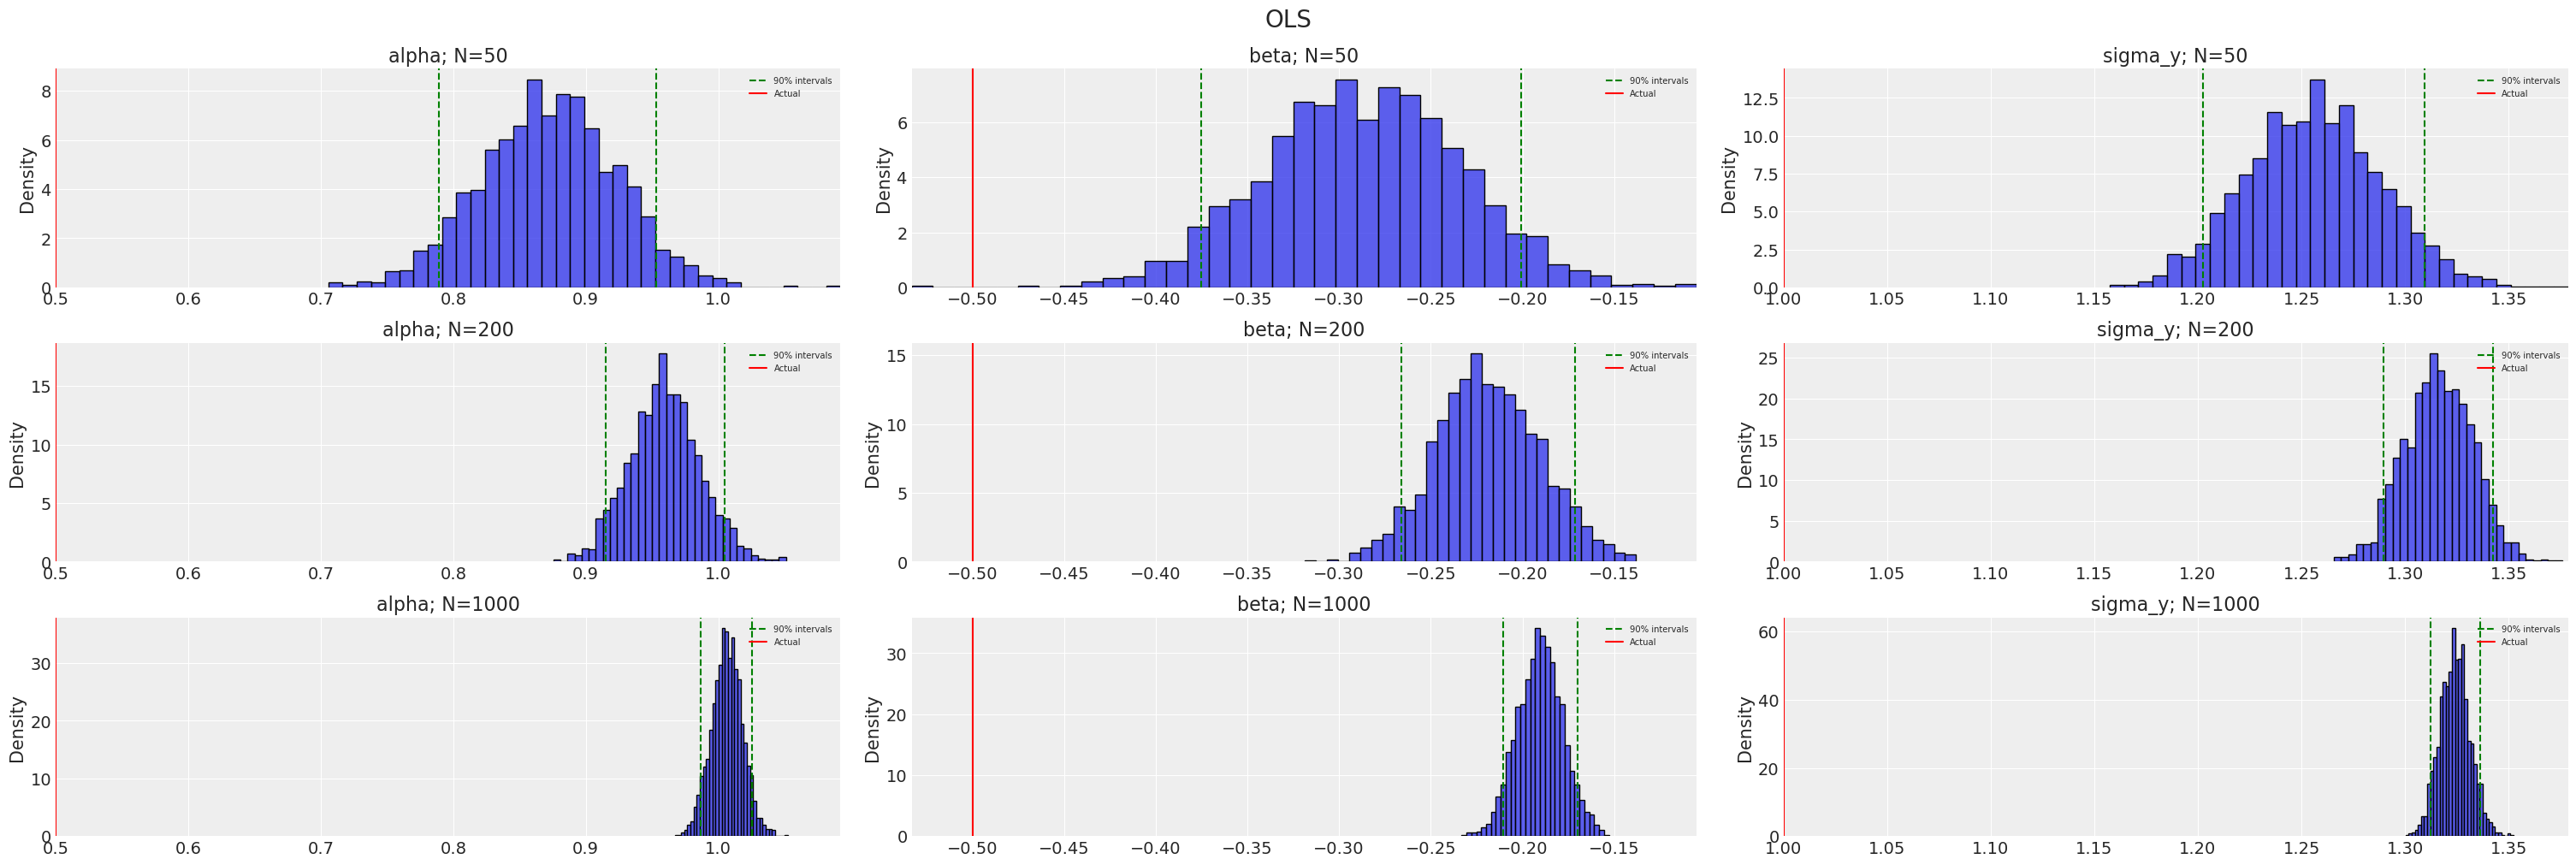

In [17]:
plot_posterior(case4_OLS, figsize=(30,10))

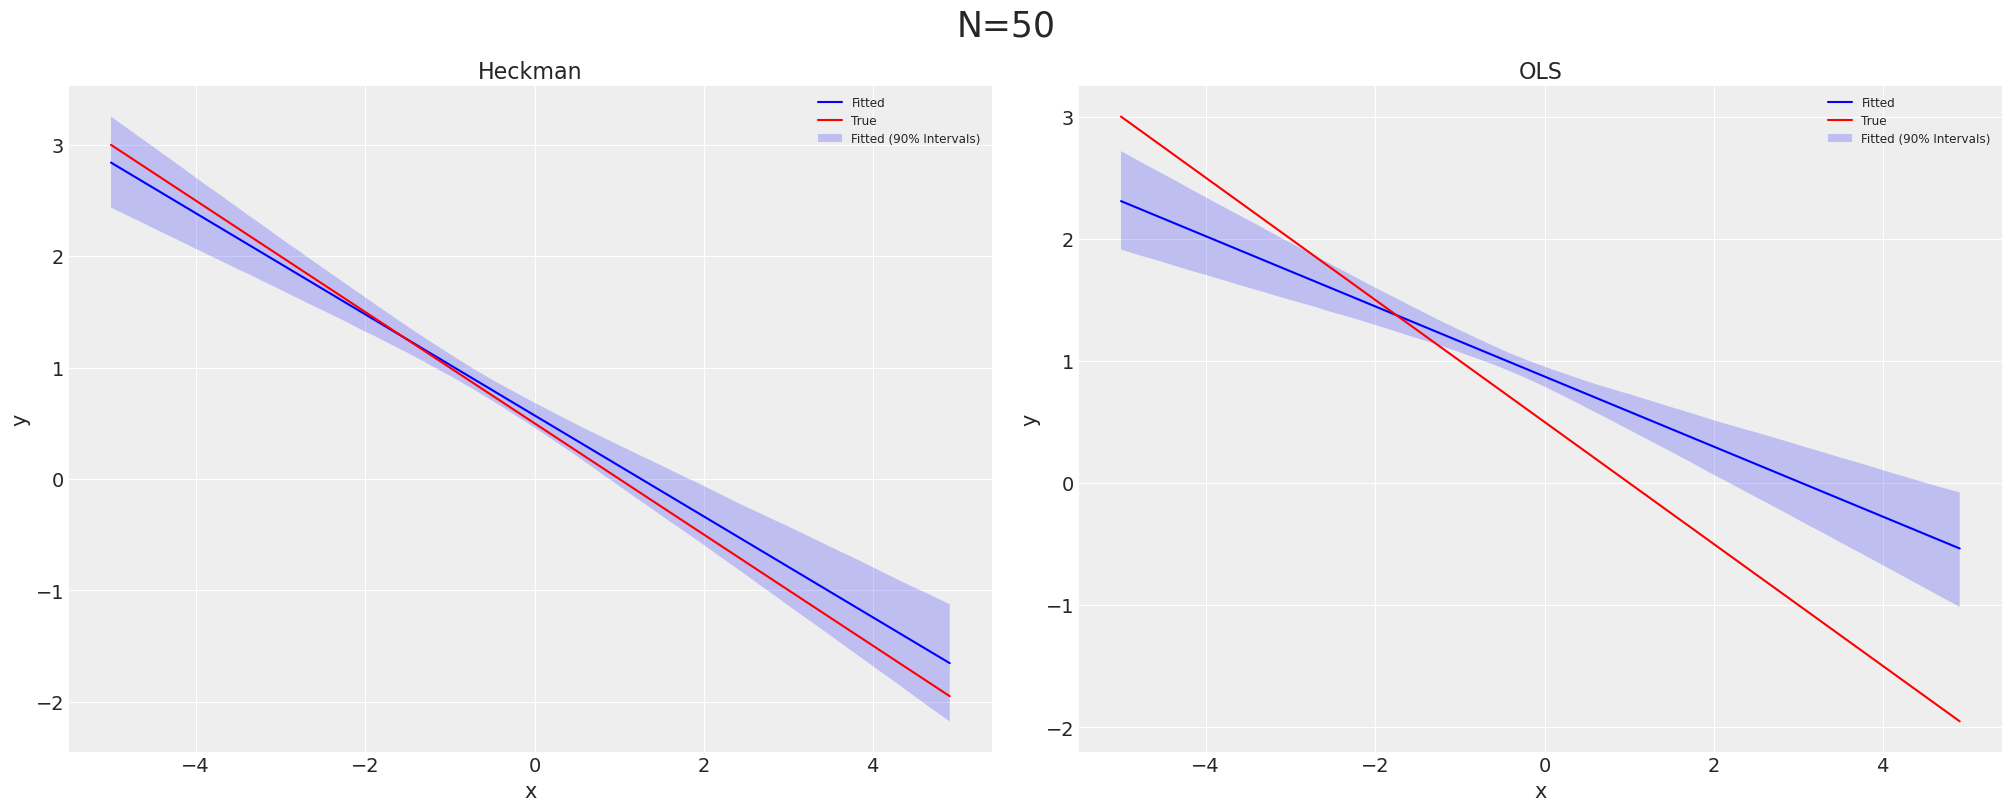

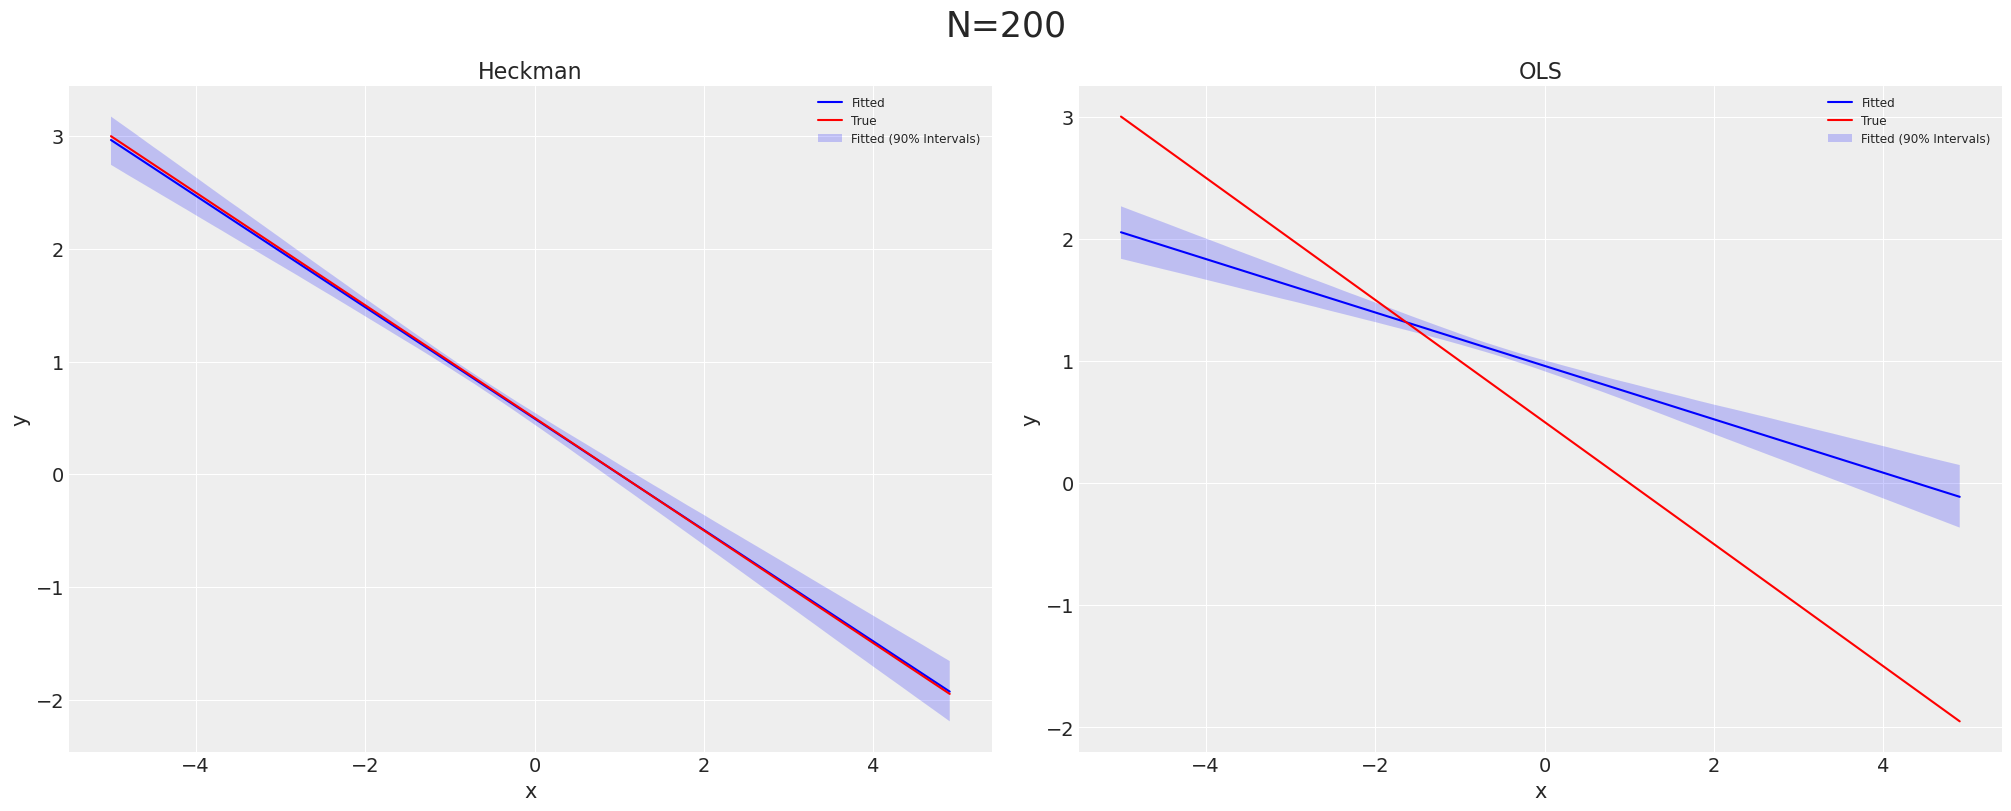

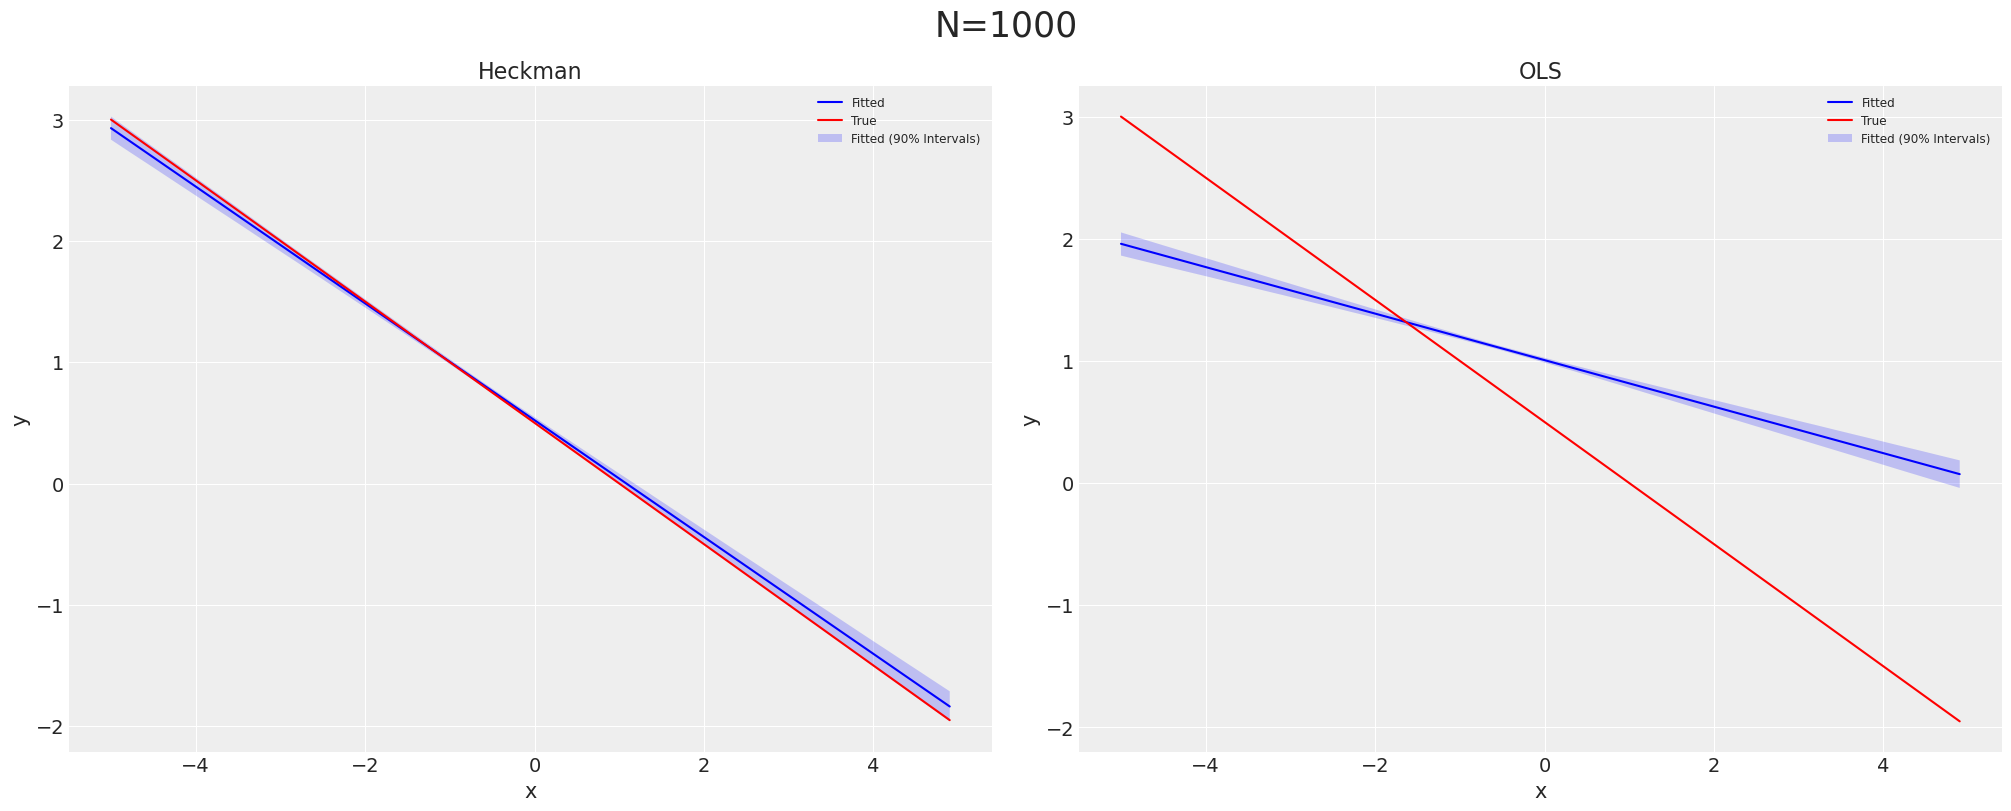

In [18]:
plot_mu_posterior(case4_Heckman, case4_OLS)